# **CIS 5450 Final Project - Credit Card Fraud Detection**


*Muskaan Beriwal, Priyam Shah, Saaransh Pandey*

# Part 1: Introduction

In today’s digital age, the frequency of online transactions has led to an increase in the sophistication and frequency of financial frauds, particularly credit card fraud. To address this pressing issue, our project develops a Credit Card Fraud Detection Model that aims to identify fraudulent transactions effectively. We hope this introduction sets the stage for a detailed discussion on our approach, findings, and recommendations based on the analysis conducted through our Credit Card Fraud Detection Model. We are committed to refining our model to keep pace with the rapidly changing landscape of cyber threats and financial crimes.


## 1.1 Objective

Credit card fraud is a pervasive issue that affects millions of individuals and businesses worldwide, resulting in substantial financial losses and undermining trust in payment systems.

The primary objective of our model is to minimize the incidence of fraud by detecting suspicious transactions before they can cause substantial damage. Early detection and precise identification of fraudulent activities are crucial in minimizing the financial impact and enhancing the security of credit transactions. Advances in technology, data analytics, and machine learning have significantly enhanced our capabilities in detecting and predicting credit card fraud, enabling more effective preventive measures and safeguarding both consumers and financial institutions against these illicit activities.

## 1.2 Value Proposition

The significance of developing an accurate and efficient fraud detection model cannot be overstated. For financial institutions, the benefits include reduced monetary losses due to fraud, enhanced customer trust and satisfaction, and compliance with regulatory standards. For customers, it ensures greater security for their financial transactions and personal information.

The Credit Card Fraud Detection Model offers a strategic advantage by leveraging cutting-edge technology, sophisticated data analytics, and advanced machine learning algorithms to proactively identify and prevent fraudulent transactions. By implementing this robust solution, businesses can ensure secure transactions, enhance customer trust, and adapt swiftly to evolving fraud tactics, thereby maintaining a competitive edge in the marketplace.




## 1.3 Analytical Approach

To tackle the complexities of credit card fraud, we employ a range of sophisticated data preprocessing techniques, EDA and machine learning algorithms. These methods are chosen for their ability to adapt dynamically to the evolving nature of fraudulent tactics and their effectiveness in handling large datasets with intricate patterns.

# Part 2: Data Loading & Preprocessing

Our model leverages a comprehensive dataset detailing various aspects of credit card transactions. This dataset includes critical information such as user profiles, card details, transactional metrics (date, time, amount), merchant information, and chip usage, alongside error logs. Each transaction record is labeled with a flag that indicates whether it is fraudulent, serving as our target variable for developing predictive models.


**Importing Libraries:**

For this step, we sought to import the relevant libraries for all stages of our report (pre-processing, exploratory data analysis, and model selection).

In [ ]:
# Data Loading and Manipulation
import pandas as pd
import numpy as np

# Data plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.io as pio
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

# Model Building Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
# Mounting drive to access our csv files

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##2.1 Loading Credit Card Transactions Data

In [ ]:
# Convert to Pandas dataframe
# cc_transactions = pd.read_csv(r'C:/Users/saaransh/Downloads/credit_card_transactions-ibm_v2-001.csv')
cc_transactions = pd.read_csv(r'C:/Users/AAKASH AGARWAL/Desktop/credit_card_transactions-ibm_v2-001.csv')

<h4><b>File: Credit Card Transactions</b></h4>

This dataset encompasses a detailed record of credit card transactions, which includes essential data such as user identities, card specifics, dates and times of transactions, transaction amounts, chip usage, and merchant information. It also notes any transactional errors and indicates whether each transaction is flagged as fraudulent. The variable "Is Fraud?" is our target variable.

## 2.2 Analyzing Data Structure

In [ ]:
# First 5 tuples of data
df1 = cc_transactions.copy()
df1.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [ ]:
# Getting total numbe rof rows and columns
print("The total number of data points: ",df1.shape[0])
print("The total number of attributes: ",df1.shape[1])

The total number of data points:  24386900
The total number of attributes:  15


Observing the above data, we can briefly summarize each variable in the dataset as follows:

* User: A unique identifier for each customer holding the credit card.
* Card: Represents a unique number identifying the credit card used for the transaction.
* Year: The year in which the transaction occurred. Useful for analyzing trends over time.
* Month: The month during which the transaction was processed.
* Day: The day of the month on which the transaction took place. This detail is useful for day-level analysis which might reveal specific days where fraud is more prevalent.
* Time: The exact time at which the transaction was recorded. Time can be critical in detecting fraud as fraudulent activities can have specific time patterns.
* Amount: The total dollar amount of the transaction.
* Use Chip: Indicates whether the transaction was made using a chip-enabled card. Transactions made with a chip are generally considered more secure.
* Merchant Name: A unique identifier for the merchant where the transaction occurred. This can help in identifying if certain merchants are more prone to fraud.
* Merchant City: The city in which the merchant is located. Geographical analysis can help pinpoint areas with higher fraud incidence.
* Merchant State: The state where the merchant is based.
* Zip: The ZIP code of the merchant's location, providing further granularity to location-based insights.
* MCC (Merchant Category Code): A code that categorizes a merchant by the type of goods or services provided. This is important as certain categories may be more susceptible to fraud.
* Errors?: Indicates whether there were any errors during the transaction process.
* Is Fraud?: A flag indicating whether the transaction was fraudulent. This is the target variable for predictive models aiming to identify fraud.



## 2.3 Data Cleaning & Pre-processing

The 'Amount' field in the transaction dataset appears to include a dollar sign ('$'), which must be removed to convert the entries from strings to floats. This conversion is crucial for any numerical analysis, such as calculating total expenditures, averaging transaction amounts, or detecting anomalies based on transaction values.

In [ ]:
# Cleaning the Data

import re

# Apply the function to the 'Amount' column to remove '$' sign.
df1['Amount'] = df1['Amount'].apply(lambda x: x.split('$')[-1]).astype(float)

As we have seen in the data structure, the 'Time' column is in the format 'H:M', representing hour and minute. We convert this column to datetime format to extract hours and minutes.

By breaking down the 'Time' into hours and minutes, it becomes easier to perform analyses that depend on the time of the day. For example, identifying high-risk hours for fraud or evaluating the impact of time on transaction volumes, which can help identify peak transaction times or unusual activity during off-hours, which might be indicative of fraud.

In [ ]:
# Splitting the time column into hours and minutes
df1['Time_in_Hours'] = pd.to_datetime(df1['Time'], format = '%H:%M').dt.hour
df1['Time_in_Mins'] = pd.to_datetime(df1['Time'], format = '%H:%M').dt.minute
df1 = df1.drop(columns=['Time'], axis = 1)
df1.head()

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Time_in_Hours,Time_in_Mins
0,0,0,2002,9,1,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No,6,21
1,0,0,2002,9,1,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,6,42
2,0,0,2002,9,2,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,6,22
3,0,0,2002,9,2,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No,17,45
4,0,0,2002,9,3,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No,6,23


Next, we perform an analysis of missing values in the dataset. Understanding where the data is missing helps in making informed decisions during the data cleaning and feature engineering phases. Missing data can bias a model or reduce its accuracy, especially if not handled correctly.



In [ ]:
# Checking the Null Values
total = round(df1.isnull().sum().sort_values(ascending=False),2)
perc = round((df1.isnull().sum()/df1.isnull().count()*100).sort_values(ascending=False),2)
pd.concat([total, perc], axis = 1, keys = ['Total', 'Percentage']).transpose()

,Errors?,Zip,Merchant State,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,MCC,Is Fraud?,Time_in_Hours,Time_in_Mins
Total,23998469.00,2878135.0,2720821.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,98.41,11.8,11.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We calculated the Total number of missing values and Percentage of missing values for each column. As we can see, the most significant data gaps are in the 'Errors?' column, where approximately **98.41%** of records are missing, followed by 'Zip' and 'Merchant State' with **11.8%** and **11.16%** missing values respectively. We will need to further examine these columns before dropping them in Feature Engineering Phase.

# Part 3: Explanatory Data Analysis

After establishing a foundational understanding of our dataset through summary statistics, we transition from preliminary data analysis to a more detailed exploration of how different features in our dataset interact with each other. This step is crucial for several reasons: By focusing on meaningful feature combinations, we enhance both our model's accuracy and our understanding of the underlying dynamics of our data. This approach not only supports more effective modeling but also provides deeper business insights, which are crucial for strategic decision-making in fraud prevention.

We selected the combinations of features based on our discretion, guided by an intuitive understanding of their importance.

## 3.1 Checking for Class Imbalance

To start, we opted to explore the distribution of fraudulent versus non-fraudulent transactions in our dataset. Class imbalance, where one class significantly outnumbers the other, is a common issue in fraud detection and can greatly influence the performance and evaluation of our models.

Analyzing class imbalance is crucial because a high degree of imbalance typically indicates that fraudulent transactions are much rarer compared to legitimate ones, which is often the case in real-world scenarios of credit card fraud. A skewed distribution can lead to challenges in training effective machine learning models. Models trained on imbalanced data may exhibit excellent overall accuracy by simply predicting the majority class, but fail to adequately detect the minority class—fraudulent transactions—which are the most critical to identify. Recognizing class imbalance helps in selecting the appropriate metrics for evaluating model performance. With an understanding of the extent of class imbalance, we can implement appropriate sampling techniques to balance the dataset. Understanding class imbalance not only aids in model development but also provides stakeholders with insights into the nature and frequency of fraud within the dataset. This can inform business strategies, such as risk management, customer service enhancements, and regulatory compliance efforts.


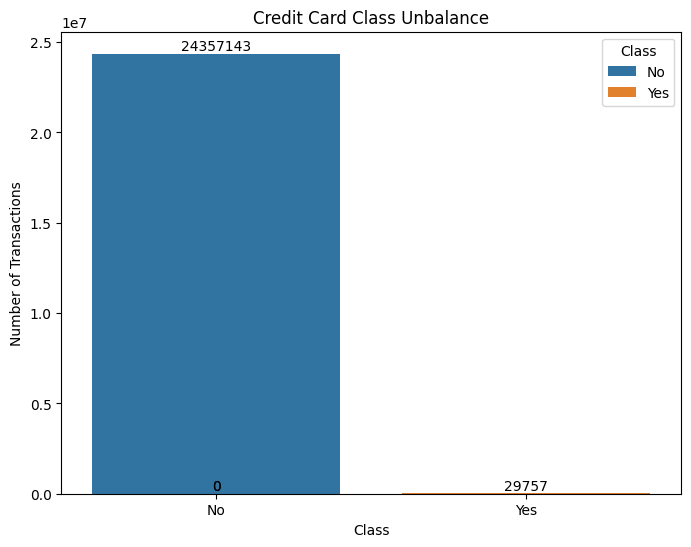

In [ ]:
temp = df1['Is Fraud?'].value_counts()
temp_df = pd.DataFrame({'Class': temp.index, 'values': temp.values})

plt.figure(figsize=(8, 6))
splot = sns.barplot(x='Class', y='values', data=temp_df, hue = 'Class', legend=True)


for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

plt.title('Credit Card Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')

plt.show()

**Analysis**

The non-fraudulent transactions dominate with **24,357,143 instances**, comprising approximately **99.88%** of the total. Conversely, the fraudulent transactions are a **mere 0.12%**, with only **29,757 cases**.
This severe imbalance can skew the predictive model, as standard algorithms will likely predict the majority class for all inputs, leading to a high accuracy that's not indicative of true performance.

Instead, metrics like Precision, Recall, F1 Score, and the ROC-AUC curve are more appropriate as they provide a better indication of how well the model is identifying the minority class (fraudulent transactions).

Techniques such as resampling the minority class, undersampling the majority class, or applying synthetic data generation methods (e.g., SMOTE) might be necessary to train a model that can detect fraudulent transactions more effectively.

This analysis sets the stage for implementing strategies that address these challenges head-on, aiming to enhance the model's performance in real-world conditions.

## 3.2 Transactions by Time


Next, we analyze transaction data based on time (hour of the day) and whether the transaction was fraudulent or not. We generate aggregated statistics for the transaction amounts, which are crucial for understanding the characteristics and patterns of transactions within each group.

By examining transactions based on time and fraud status, we can identify patterns that may be specific to fraudulent activities. For example, if fraudulent transactions peak at certain hours, preventive measures can be targeted more effectively.


In [ ]:
tmp = df1.groupby(['Time_in_Hours','Is Fraud?'])['Amount'].aggregate(['min','max','count','sum', 'mean', 'median', 'var']).reset_index()

tmp_df = pd.DataFrame(tmp)
tmp_df.columns = ['Hour', 'Class', 'Min', 'Max', 'Count', 'Sum', 'Mean', 'Median', 'Var']
tmp_df

,Hour,Class,Min,Max,Count,Sum,Mean,Median,Var
0,0,No,-500.0,2787.78,235488,12514425.43,53.142519,37.930,8349.841921
1,0,Yes,-486.0,609.98,120,7604.03,63.366917,43.970,36292.486484
2,1,No,-500.0,2518.20,213226,11963748.19,56.108299,37.140,10704.203876
3,1,Yes,-487.0,1246.28,185,9073.67,49.046865,49.050,56774.556196
4,2,No,-500.0,4729.38,213844,10913435.17,51.034563,33.300,9168.286329
5,2,Yes,-497.0,1198.09,231,14881.17,64.420649,51.940,50857.044657
6,3,No,-500.0,3516.73,183028,9655356.18,52.753438,33.180,10222.720541
7,3,Yes,-498.0,4133.28,342,36880.22,107.836901,67.480,183334.102611
8,4,No,-500.0,4266.21,203178,11382779.42,56.023681,41.000,9566.252144
9,4,Yes,-494.0,1099.15,372,18194.92,48.911075,55.925,56333.392267


Using the above dataframe, we analyse the following relationships:
* Sum of Transaction Amounts by Hour
* Count of Transactions by Hour
* Mean value of Transaction Amounts by Hour
* Median value of Transaction Amounts by Hour


Visualizing these five specific metrics provide valuable insights into the transactional dynamics associated with credit card use, particularly in distinguishing between normal and potentially fraudulent activities.

1. Sum of Transaction Amounts by Hour: Measures the total value of transactions within each hour. This can highlight peak transaction periods and potential times when fraudulent activity might be masked by high volumes of legitimate transactions. Detecting spikes in transaction volumes at unusual hours might indicate coordinated fraud attempts or system vulnerabilities being exploited when monitoring may be lower.

2. Count of Transactions by Hour: Tracks the number of transactions occurring in each hour, regardless of transaction size. A sudden increase in transaction count, especially during off-peak hours, might suggest fraudulent activity.

3. Mean Value of Transaction Amount by Hour: Calculates the average transaction amount per hour, giving a sense of typical transaction size. An unusual increase or decrease in the average transaction size during certain hours could indicate fraud, especially if transactions deviate significantly from the norm without a clear reason.

4. Median Value of Transaction Amount by Hour: The median provides a robust measure of central tendency, less affected by outliers and skewed data than the mean. Analyzing the median transaction amount can help identify trends and shifts in spending behavior that are not as easily influenced by extreme values, providing a clearer picture of typical transaction activities.


The choice to use line plots for visualizing the relationships between transaction metrics and time (hours of the day) is particularly appropriate as Line plots are ideal for time series data, which is fundamentally about tracking how metrics change over time. In the context of credit card transactions, tracking how sums, counts, means, maximums, and medians vary by hour provides clear insights into trends and patterns over the course of a day. Line graphs also provide a visual continuity that helps in easily observing trends, seasonal peaks, and troughs in data. This continuity makes it easier to identify periods of unusual activity, which could be indicative of fraud.


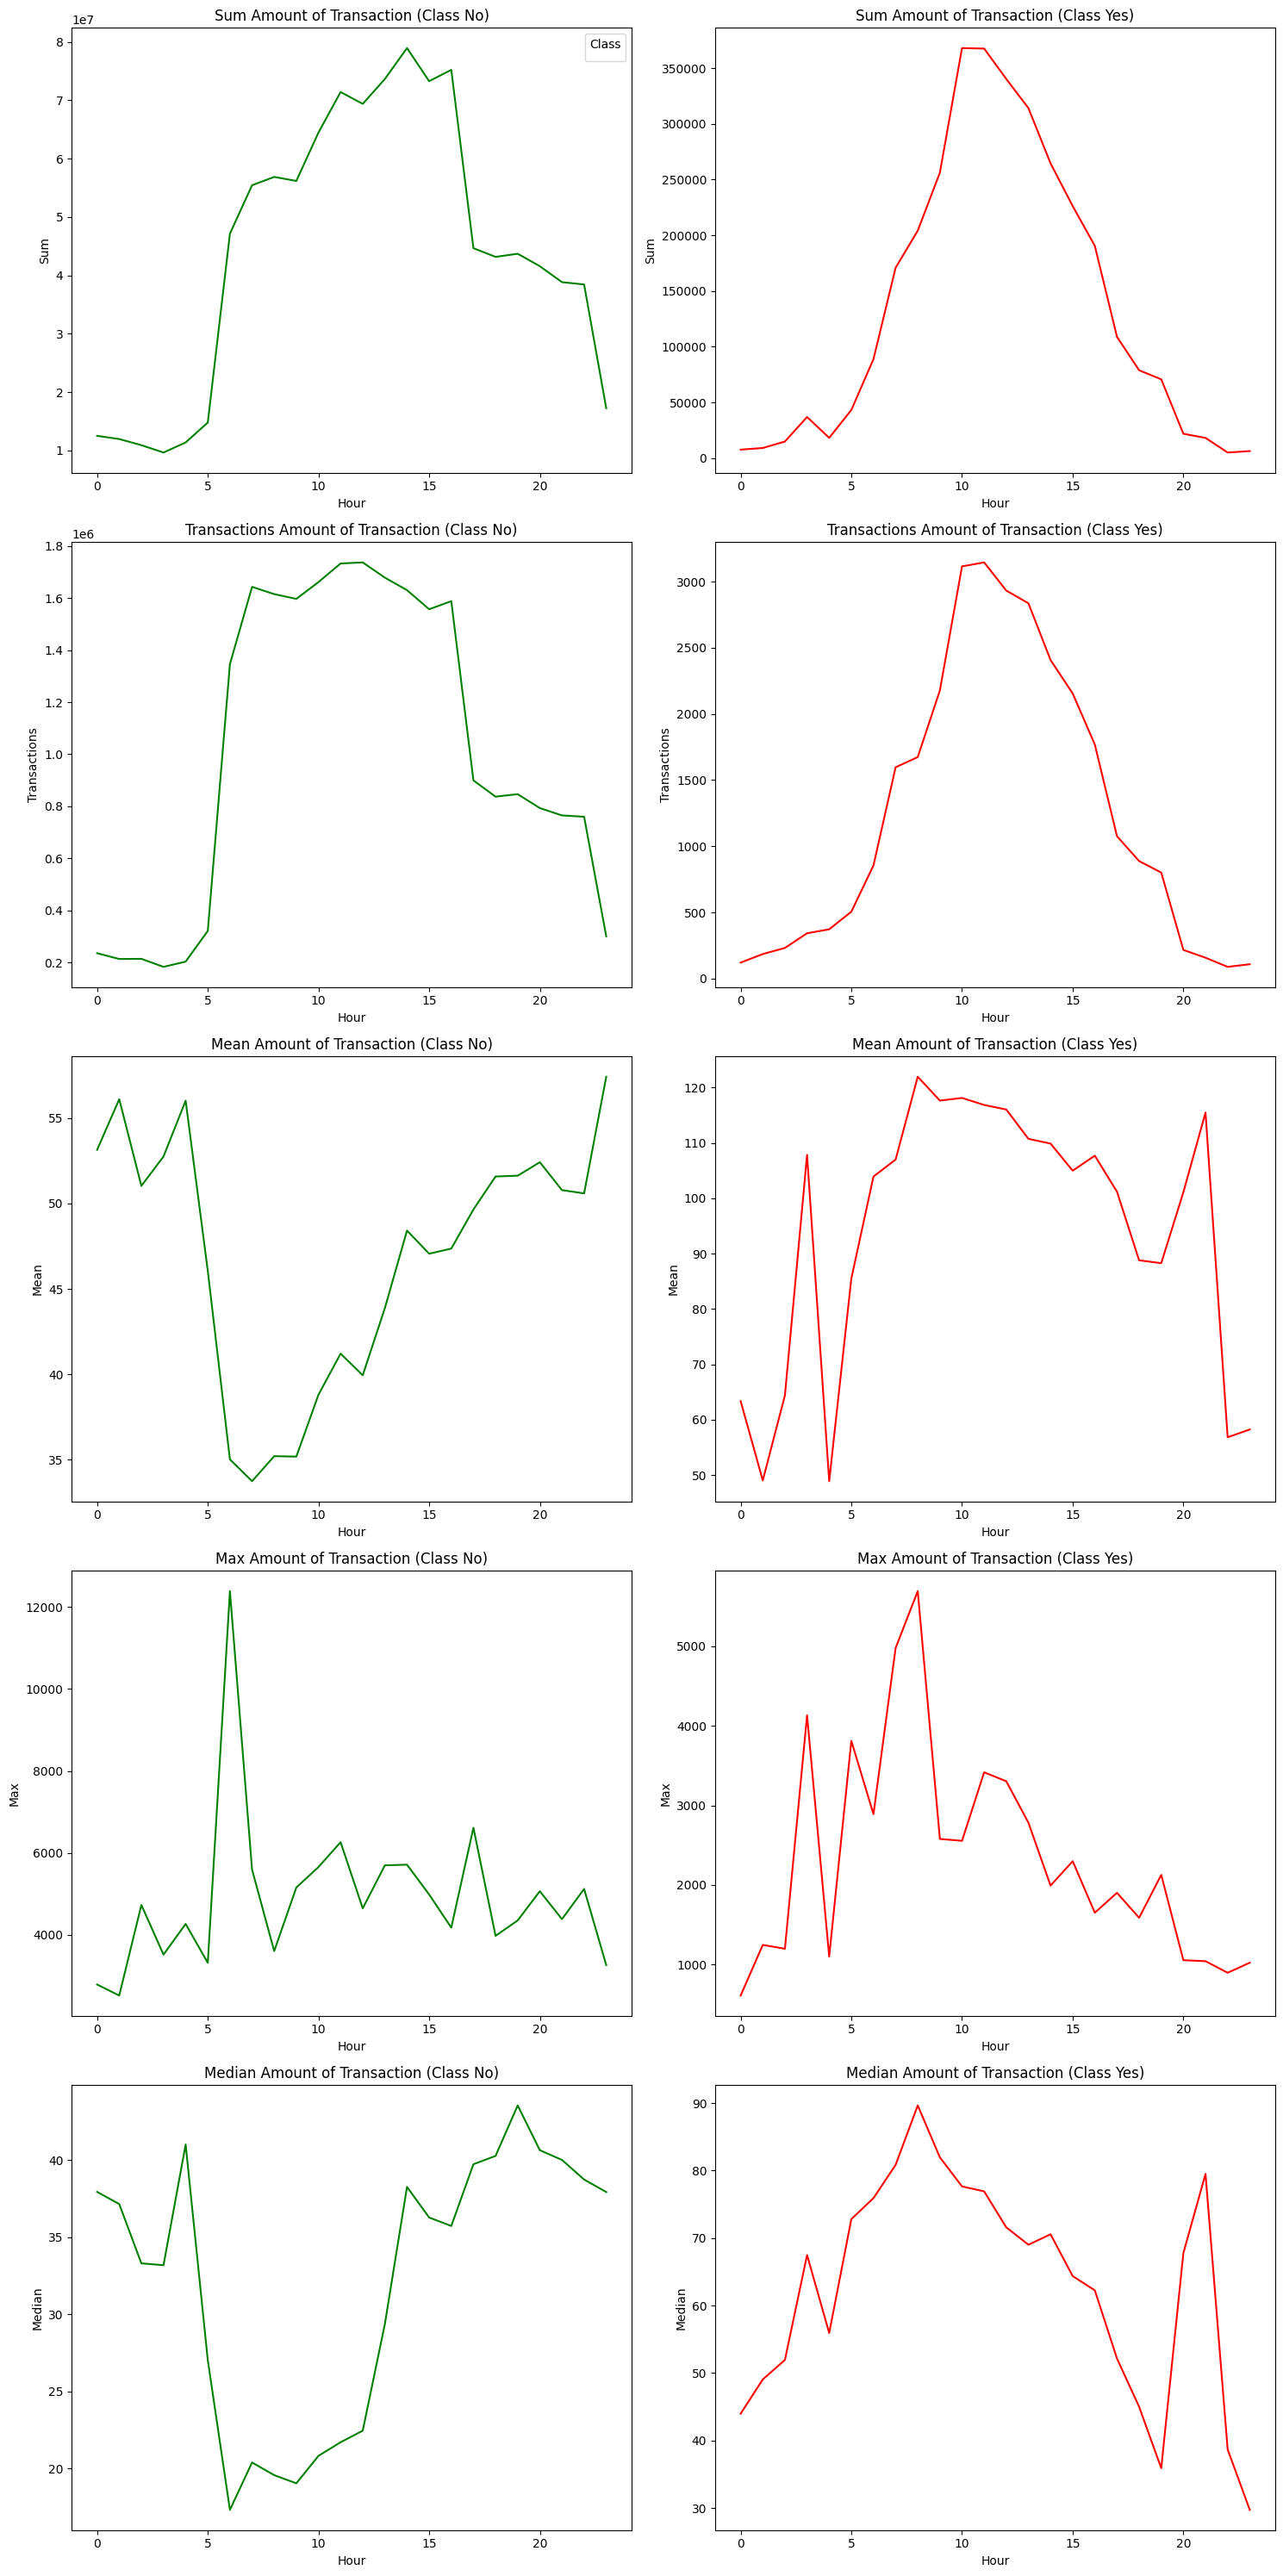

In [ ]:
def generate_seaborn_plots(tmp_df):
    metrics = ['Sum', 'Count', 'Mean', 'Median']
    classes = ['No', 'Yes']
    colors = {'No': 'green', 'Yes': 'red'}

    # Create a figure with subplots in a 5x2 grid
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Iterate over each metric and class combination to create individual plots
    for i, metric in enumerate(metrics):
        for j, class_label in enumerate(classes):
            # Filter data for the current class
            filtered_data = tmp_df[tmp_df['Class'] == class_label]

            # Determine the subplot index
            ax_idx = i * 2 + j

            # Create line plot
            sns.lineplot(x='Hour', y=metric, data=filtered_data, ax=axes[ax_idx], color=colors[class_label])

            # Set individual subplot titles
            axes[ax_idx].set_title(f'{metric} of Transaction Amounts by Hour (Class {class_label})')

            # Option to show legend only on the first plot
            if i == 0 and j == 0:
                axes[ax_idx].legend(title='Class')

    # Adjust layout for better fit and show the plot
    plt.tight_layout()
    plt.show()

generate_seaborn_plots(tmp_df)

**Analysis**

* Sum of Transaction Amounts by Hour:  For the 'No' class, the pattern reflects normal consumer behavior, with a peak in the morning that could correlate with the start of business hours and typical bill payments or shopping activities. The decline in the afternoon might correspond with the end of peak commercial activities. For the 'Yes' class, the sum of fraudulent transactions shows a more dramatic fluctuation. Starting from a minimal amount at midnight, there is a sharp increase peaking around 9 AM. The sharp increase and peak of fraudulent transactions in the morning hours suggest that fraudsters might exploit high transaction volumes during this time, attempting to mask fraudulent activities within the peak periods of legitimate transactions. The significant drop in the afternoon and evening could indicate that as transaction volumes decrease, fewer opportunities exist to disguise fraudulent transactions, or that automated fraud detection systems become more effective during lower volume periods.

* Count of Transactions by Hour: For the 'No' class, the sharp peak in the number of transactions in the morning likely corresponds to regular consumer activity, such as shopping and payments, which are typical after the start of a typical workday. The gradual decline towards the evening may reflect reduced consumer activity as the day ends. For fraudulent transactions, the graph begins with a relatively low amount of transactions at midnight, which then starts increasing sharply from early morning, peaks around mid-morning. This pattern could indicate that fraudsters aim to carry out transactions during high traffic times to potentially mask their activities among the volume of legitimate transactions. The sharp decline post-peak suggests that fraudulent activities might be timed to exploit specific vulnerabilities or patterns in transaction monitoring systems. This trend is similar to the one above in 'Sum', which is expected.

* Mean Value of Transaction Amount by Hour: The graph for non-fraudulent transactions demonstrates a pattern that could reflect typical consumer spending behavior, where transaction sizes increase throughout the day and peak in the evening, possibly correlating with after-work shopping or bill payments. The mean transaction amount for fraudulent transactions is more volatile compared to non-fraudulent transactions. There are sharp peaks at around 5 AM and another spike around 7 PM, with significant drops in between. The spikes in mean transaction amount during early and late hours for fraudulent transactions might suggest that fraudsters prefer these times, possibly due to lower vigilance or the cover provided by high transaction volumes during peak hours. The significantly higher transaction amounts could indicate targeted high-value fraud attempts during these hours.

* Median Value of Transaction Amount by Hour: For the 'No' class, the peaks in the morning and evening could correspond with typical consumer spending patterns. The median transaction amount for fraudulent transactions shows more variability. There is a gradual increase from midnight, peaking around 5 AM. The early morning and late evening spikes may indicate times when oversight is lower, and fraudulent activities are easier to carry out. The high median values suggest that fraud attempts might involve larger transaction amounts, potentially to maximize the return before detection.





We also plot the Number of Fradulent Transactions by Hour as a bar graph. This can help us in highlighting specific hours when fraudulent activity peaks. These insights can be crucial for financial institutions to optimize their real-time fraud monitoring systems.

<Figure size 1000x600 with 0 Axes>

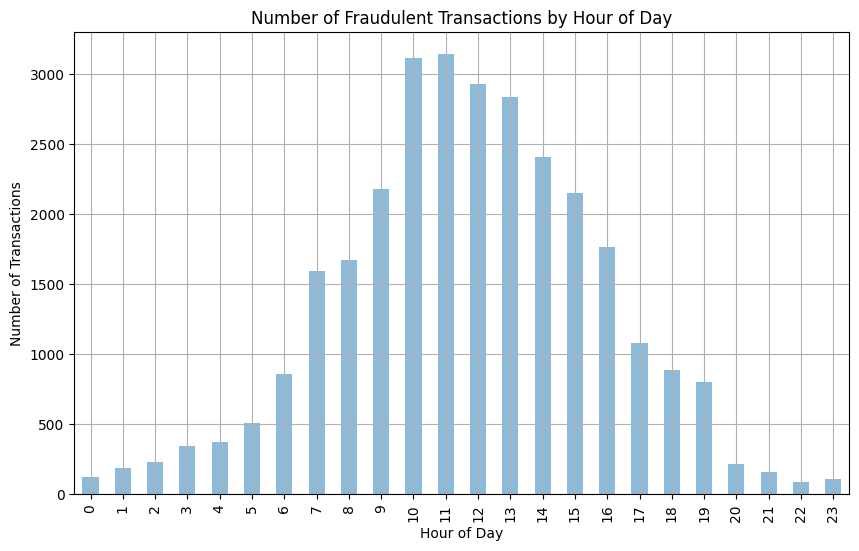

In [ ]:
# Now filter the DataFrame for fraud transactions
fraud = df1.loc[df1['Is Fraud?'] == 'Yes']

# Group by 'Time_in_hours' and count the number of transactions per hour
transactions_per_hour = fraud.groupby('Time_in_Hours').size()

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Create a bar plot
plt.figure(figsize=(10, 6))
transactions_per_hour.plot(kind='bar', alpha=0.5)

# Title and labels
plt.title('Number of Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')

# Optional: Customize the x-axis to show every hour
plt.xticks(range(0, 24))

plt.grid(True)  # Optional: Add a grid for better readability
plt.show()

**Analysis**

Peak Hours: The peak hours for fraud (from 10 AM to 4 PM) suggest that fraudsters might be exploiting high transaction volumes during typical business hours. Financial institutions and businesses may need to enhance monitoring and apply real-time fraud detection techniques during these hours.

Off-Peak Hours Vigilance: The decrease in fraud after traditional business hours does not mean vigilance should be lowered, as fraud still occurs. Continuous monitoring is essential, though resources may be more focused during peak times.

## 3.3 Distribution of Transaction Amounts

Next, we create boxplots to compare the distributions of transaction amounts for fraudulent and non-fraudulent transactions, with one plot showing outliers and the other not showing them. We chose boxplots as they provide a visual summary of the central tendency and variability of transaction amounts within each category (fraudulent vs. non-fraudulent). The first plot that includes outliers helps in understanding the extent of extreme values in transaction amounts, which can be crucial for detecting anomalies that might be indicative of fraud. The second plot, excluding outliers, offers a clearer view of the "typical" data distribution, making it easier to compare the central body of the data distributions between fraudulent and non-fraudulent transactions without extreme values skewing the visual representation.

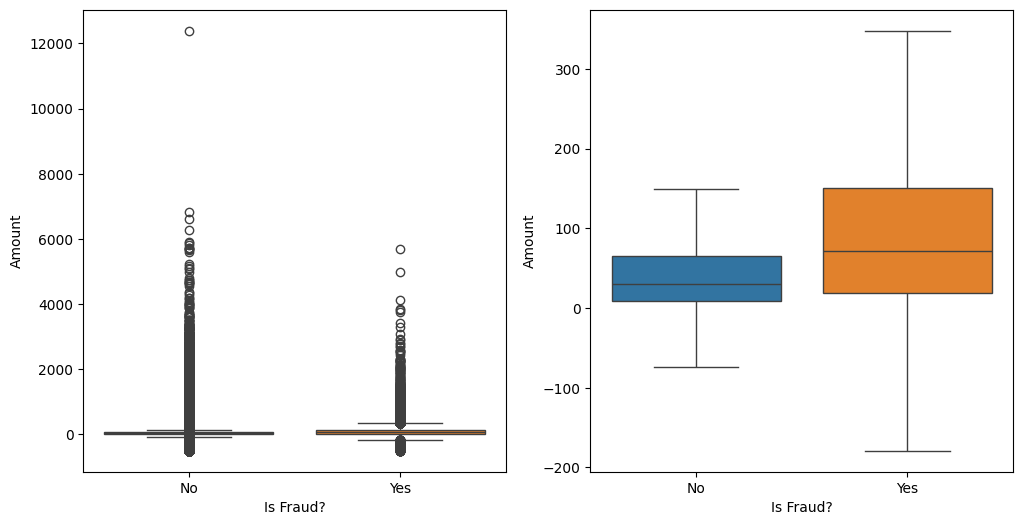

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,6))
s = sns.boxplot(ax = ax1, x = 'Is Fraud?', y = 'Amount', hue = 'Is Fraud?', data = df1, showfliers = True)
s = sns.boxplot(ax = ax2, x = 'Is Fraud?', y = 'Amount', hue = 'Is Fraud?', data = df1, showfliers = False)
plt.show()

**Analysis**

Left Boxplot: The box is compressed at lower values, indicating that most legitimate transactions are of lower amounts, which is typical for everyday consumer behavior. The median is close to the bottom of the box, suggesting a skewed distribution with most transactions being small. A significant number of outliers extend upwards, showing that while most legitimate transactions are small, there are exceptions with very high amounts. The boxplot for Fraudulent transactions also shows a compressed box but at a slightly higher level than the non-fraudulent transactions. There are fewer outliers, but the range of outliers is quite extended, indicating that fraudulent transactions can vary widely in amount, with some reaching very high values.

Right Boxplot: The blue boxplot without outliers gives a clearer view of the "normal" range of transaction amounts, with a tight interquartile range. The orange boxplot without outliers shows a slightly higher median and a wider interquartile range compared to non-fraudulent transactions. This indicates that fraudulent transactions tend to be higher on average than non-fraudulent ones and exhibit greater variability in amount.

The higher position of the median and wider spread in fraudulent transactions suggest that fraud detection systems should be particularly alert for transactions that are higher than typical consumer transaction amounts, as these are more likely to be fraudulent.

##3.4 Transactions by Merchant State

We move on to analyze transaction data by comparing the number of fraudulent and legitimate transactions for each merchant state, then calculating the percentage of transactions that are fraudulent within each state. This can help us identify geographical areas with higher occurrences of fraud. This information is crucial for pinpointing regions where stricter fraud prevention measures might be necessary or where additional scrutiny of transactions could be beneficial. Understanding which states have higher fraud rates can also help in developing more sophisticated fraud detection models. These models could include location as a predictive feature, improving their accuracy by recognizing patterns that are specific to certain geographical areas.

In [ ]:
# Filter for rows where 'Is Fraud?' is 'Yes' or 'No' and count the number of transactions per 'Merchant State'
fraud_counts = df1[df1['Is Fraud?'] == 'Yes']['Merchant State'].value_counts()
legitimate_counts = df1[df1['Is Fraud?'] == 'No']['Merchant State'].value_counts()
Percentage = round(fraud_counts/(fraud_counts + legitimate_counts)*100,2) #Calculate the percentage of Fraud out of total transactions

# Create a DataFrame from the counts
transaction_counts = pd.DataFrame({
    'Fraud': fraud_counts,
    'Legitimate': legitimate_counts,
    'Perc of Fraud': Percentage
})

transaction_counts = transaction_counts.sort_values(by = 'Perc of Fraud', ascending=False).reset_index()
transaction_counts.head(10)

,Merchant State,Fraud,Legitimate,Perc of Fraud
0,Algeria,629.0,25.0,96.18
1,Haiti,375.0,71.0,84.08
2,Fiji,32.0,8.0,80.00
3,Nigeria,143.0,90.0,61.37
4,Turkey,257.0,215.0,54.45


Algeria and Haiti show extremely high percentages of fraud transactions out of total transactions (96.18% and 84.08%, respectively). This suggests that nearly all transactions in Algeria and a vast majority in Haiti are fraudulent. Such high rates are indicative of either very targeted fraud schemes operating in these regions or insufficient fraud detection and prevention measures. Fiji also has a high fraud rate at 80%, which suggests a significant vulnerability.

We also plot the Number of fraud transactions by Merchant State to further aid the above analysis.

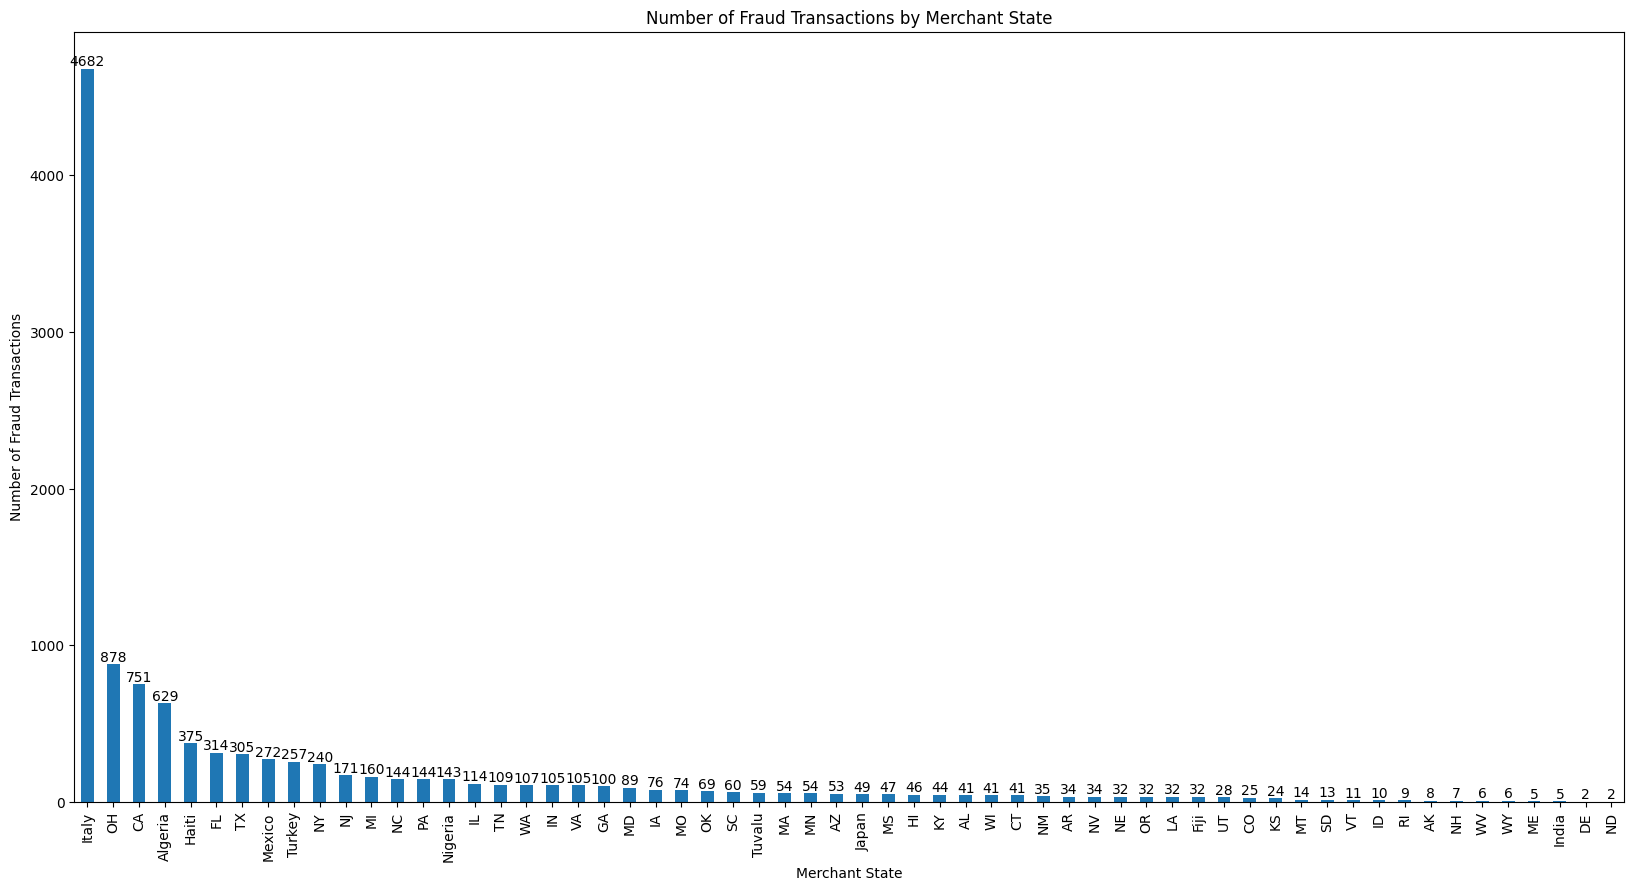

In [ ]:
# Filter for rows where 'Is Fraud?' is 'Yes'
fraud_df = df1[df1['Is Fraud?'] == 'Yes']

# Count the number of fraudulent transactions per 'Merchant State'
fraud_counts = fraud_df['Merchant State'].value_counts()

# Create a bar graph
fraud_counts.plot(kind='bar', figsize=(20, 10))

plt.title('Number of Fraud Transactions by Merchant State')
plt.xlabel('Merchant State')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=90)  # Rotate the x labels for better readability if there are many states


# Annotate the number of transactions on top of each bar
for index, value in enumerate(fraud_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

**Analysis**

The graph shows a significant concentration of fraudulent transactions in certain states, notably Italy, which has the highest count with 4682 fraudulent transactions. This is followed by other states like California (CA) and Ohio (OH), though with significantly lower numbers (878 and 751, respectively). Most states have relatively few fraudulent transactions, forming a long tail in the distribution. The high number of fraud cases in Italy could indicate specific vulnerabilities or targeted fraud schemes operating within this region. It may suggest that Italy, perhaps due to certain socio-economic factors, market conditions, or less stringent regulatory environments, is more susceptible to fraud activities. The skewed distribution also raises questions about the efficiency of fraud detection systems across different states. It may indicate that certain regions are better at detecting and reporting fraud than others, or alternatively, that fraudsters find some states more appealing due to weaker detection systems.

While the graph provides a clear picture of the raw counts of fraud incidents, combining this with the previously discussed percentage of fraud transactions provides a deeper understanding. For example: A state like Nigeria, which might have a lower number of total fraud cases compared to Italy but a higher percentage of transactions that are fraudulent, could be considered more "risky" on a per-transaction basis. This would suggest that while fewer transactions are occurring, a larger proportion of them are fraudulent, indicating a highly efficient or targeted fraud mechanism at play.

Overall, this kind of analysis allows for a nuanced approach to fraud prevention, combining insights into both the prevalence and intensity of fraudulent activities by region. Such a dual perspective is crucial for developing effective fraud prevention strategies that are both broad in scope and targeted in their application.

##3.5 Transactions by 'Use Chip'

Another useful analysis is understanding the relationship between chip usage in transactions ("Use Chip") and the occurrence of fraudulent and legitimate transactions. This analysis is particularly relevant in the context of credit card security features such as EMV (Europay, MasterCard, and Visa) chips, as chip-enabled cards are known to provide better security against fraud compared to magnetic stripe cards because they are harder to clone. Analyzing how many fraudulent transactions occur with chip versus non-chip transactions can help quantify the effectiveness of chip technology in deterring fraud.

Using Side-by-side Count Plots for both fraudulent and legitimate transactions provides a visual comparison of chip usage patterns between these two categories.

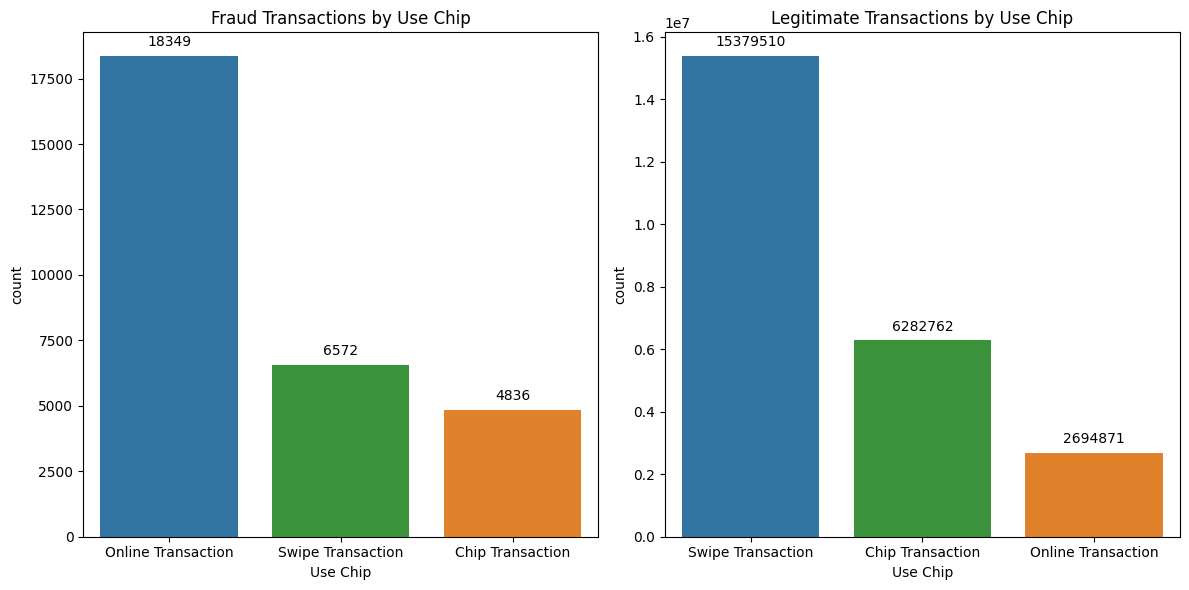

In [ ]:
# Filter for rows where 'Is Fraud?' is 'Yes' or 'No'
fraud_df = df1[df1['Is Fraud?'] == 'Yes']
legitimate_df = df1[df1['Is Fraud?'] == 'No']

# Count the number of fraudulent and legitimate transactions per 'Use Chip'
fraud_counts = fraud_df['Use Chip'].value_counts()
legitimate_counts = legitimate_df['Use Chip'].value_counts()

# Define the order and color mapping to ensure consistency across plots
order = df1['Use Chip'].value_counts().index  # This orders by the overall frequency across fraud and non-fraud
colors = {"Online Transaction": "blue", "Swipe Transaction": "green", "Chip Transaction": "orange"}  # Example colors

# Set up the matplotlib figure
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Create count plots
sns.countplot(ax=ax1, data=fraud_df, x='Use Chip', order=order, hue='Use Chip', palette=colors)
sns.countplot(ax=ax2, data=legitimate_df, x='Use Chip', order=order, hue='Use Chip', palette=colors)

# Set titles
ax1.set_title('Fraud Transactions by Use Chip')
ax2.set_title('Legitimate Transactions by Use Chip')

# Annotate the number of transactions on top of each bar
# This needs to be adapted if you want to annotate the bars in the vertical plot
for ax in [ax1, ax2]:  # Loop over both axes
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


**Analysis**

Fraud Transactions by Use Chip: Online Transactions had a significantly higher number of fraudulent transactions occur online compared to swipe and chip transactions. This may indicate that online transactions are more susceptible to fraud, possibly due to the easier exploitation of security vulnerabilities in the digital space. There are fewer fraudulent transactions with swipe methods than online, but still considerably more than chip transactions. This aligns with the generally understood security risks associated with magnetic stripe transactions, which are easier to counterfeit compared to chip transactions. Chip Transactions show the least number of fraudulent transactions, suggesting that EMV chip technology is effective in reducing fraud risks due to its encryption and authentication mechanisms.

Legitimate Transactions by Use Chip: The majority of legitimate transactions were swipe transactions without chip usage. The second most common were chip transactions, which are lower in number compared to swipe but still significant. There are fewer legitimate online transactions in comparison to physical transactions (swipe and chip). These visuals could inform a fraud detection model that transactions without a physical card (like online transactions) have a higher proportion of fraud, while those with a chip tend to be more secure, likely due to the added security features of chip technology. This insight might be used to apply stricter fraud detection rules for online transactions compared to chip transactions.

The high number of fraudulent online transactions highlights a critical need for enhanced security measures in digital transaction platforms, such as stronger encryption, two-factor authentication, and advanced fraud detection algorithms.



We also provide a comprehensive view of the counts and proportions of fraudulent versus legitimate transactions by different transaction modes: Swipe Transaction, Chip Transaction, and Online Transaction.

In [ ]:
# Filter for rows where 'Is Fraud?' is 'Yes' or 'No' and count the number of transaction by Mode of Transaction
fraud_counts = df1[df1['Is Fraud?'] == 'Yes']['Use Chip'].value_counts()
legitimate_counts = df1[df1['Is Fraud?'] == 'No']['Use Chip'].value_counts()
perc_Fraud = round((fraud_counts/(len(df1[df1['Is Fraud?'] == 'Yes']))) * 100,2)
perc_Legitimate = round((legitimate_counts/(len(df1[df1['Is Fraud?'] == 'No']))) * 100,2)
# Create a DataFrame from the counts
transaction_counts = pd.DataFrame({
    'Fraud': fraud_counts,
    'Legitimate': legitimate_counts,
    'perc_Fraud': perc_Fraud,
    'perc_Legitimate': perc_Legitimate
})

transaction_counts = transaction_counts.sort_values(by = 'perc_Legitimate', ascending=False).reset_index()
transaction_counts

,Use Chip,Fraud,Legitimate,perc_Fraud,perc_Legitimate
0,Swipe Transaction,6572,15379510,22.09,63.14
1,Chip Transaction,4836,6282762,16.25,25.79
2,Online Transaction,18349,2694871,61.66,11.06


**Analysis**

Online Transactions: The highest percentage of fraud occurs in online transactions (61.66%), indicating that this mode is particularly vulnerable to fraudulent activities. This might be due to the less stringent verification processes available online compared to physical transactions.

Swipe Transactions: Common but Relatively Safer - While swipe transactions constitute the majority of legitimate transactions (63.14%), they represent a smaller proportion of the fraud cases (22.09%). This suggests that while swipe transactions are common, they are relatively safer than online transactions.

Chip Transactions: Safest Mode - Chip transactions have the lowest percentage of fraud (16.25%) compared to their legitimate transaction count, supporting the idea that EMV (Europay, MasterCard, and Visa) chip technology is effective in reducing fraud risks.

This table not only underscores the vulnerabilities and risks associated with different transaction modes but also helps in pinpointing where efforts in fraud prevention should be directed.

## 3.6 Per Transaction Amount by Hour

Next, we analyze the relationship between the time of day (in hours) and the transaction amount (per transaction) for fraudulent transactions. Scatter plots are excellent for displaying the distribution of two numerical variables and can reveal any correlations, clusters, or outliers between them. In this context, the scatter plot shows how fraudulent transaction amounts vary throughout the day. This visualization can help identify if there are specific times of day when particularly high or low-value fraudulent transactions tend to occur. For instance, if higher-value frauds consistently appear at certain hours, it may suggest targeted fraud activities during those times. Scatter plots also make it easy to spot outliers. Transactions that stand out as significantly higher in amount compared to others at similar times can be quickly identified. This is crucial for fraud detection as outliers can often indicate fraudulent activity.

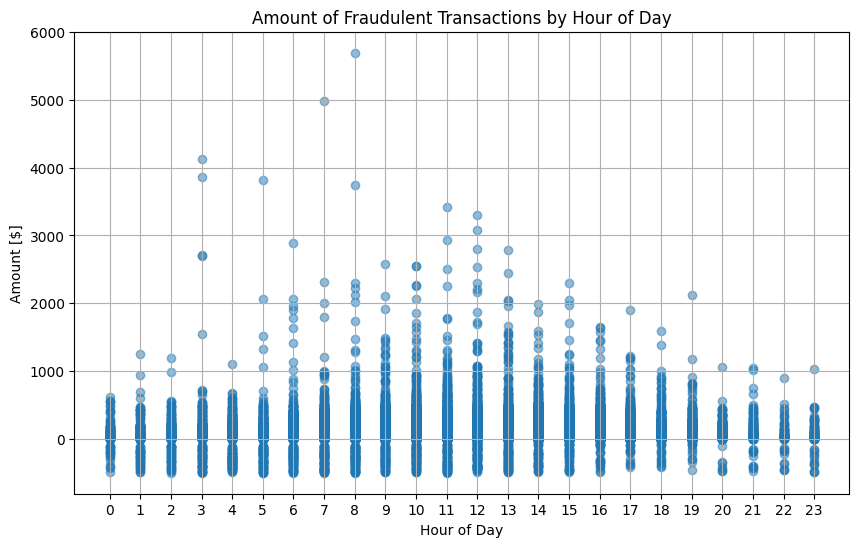

In [ ]:
# Now filter the DataFrame for fraud transactions
fraud = df1.loc[df1['Is Fraud?'] == 'Yes']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(fraud['Time_in_Hours'], fraud['Amount'], alpha=0.5)

# Title and labels
plt.title('Per Transaction Amount by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Amount [$]')

# Optional: Customize the x-axis to show every hour
plt.xticks(range(0, 24))

plt.grid(True)  # Optional: Add a grid for better readability
plt.show()


**Analysis**

The plot shows a wide range of transaction amounts for each hour, with some hours exhibiting higher variability and transaction amounts than others.


Peak Transaction Amounts: The most significant amounts appear sporadically, but there are visible clusters of higher-value transactions around midday (around 12 PM to 2 PM) and in the late evening (around 9 PM to 11 PM). Early morning hours show relatively fewer high-value fraudulent transactions.

Density of Transactions: Hours like 10 AM, 1 PM, and 3 PM to 4 PM show a denser collection of points at higher transaction values, indicating a frequent occurrence of higher-amount frauds during these periods. Nighttime hours and very early morning hours generally show lower amounts and densities of transactions.

High-Risk Hours: The midday and late evening peaks suggest that fraudsters may take advantage of high transaction volumes during these hours, or perhaps these times might align with lower vigilance on the part of consumers and fraud monitoring systems.

## 3.7 Transactions by MCC

Lastly, we analyze the distribution of fraudulent transactions across different Merchant Category Codes (MCC). MCCs are standardized codes used to classify businesses by the type of goods or services they provide. By examining the frequency of fraudulent transactions by MCC, we can identify specific types of businesses or sectors that are more susceptible to fraud. This is crucial for risk assessment and management. Understanding which MCCs are most prone to fraud can also help in creating meaningful features for predictive models.

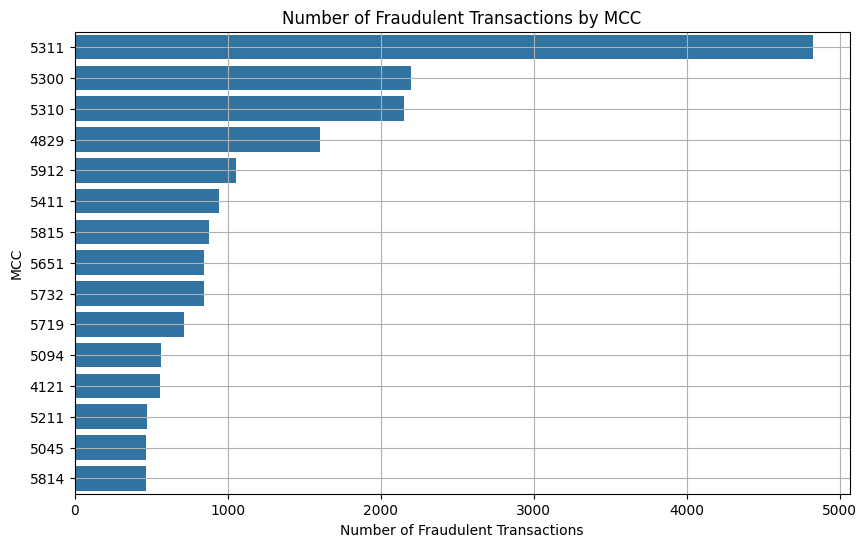

In [ ]:
# Now filter the DataFrame for fraud transactions
fraud = df1.loc[df1['Is Fraud?'] == 'Yes']

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, y='MCC', order=fraud['MCC'].value_counts().head(15).index)

# Title and labels
plt.title('Number of Fraudulent Transactions by MCC')
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('MCC')
plt.grid(True)  # Optional: Add a grid for better readability
plt.show()

**Analysis**

Graph Analysis
Distribution: The graph ranks different MCCs by the number of fraudulent transactions associated with each. The MCC at the top, 5311 (typically associated with department stores), shows the highest count, indicating a substantial focus of fraudulent activity in this category.
Decline in Fraud Occurrences: As you move down the graph, the number of fraudulent transactions decreases, suggesting that fraudsters target certain types of businesses more than others. For example, businesses under MCC 5311 experience far more fraudulent transactions than those categorized under MCC 5814, which appears at the bottom of the visible list.
Visualization Detail: The graph is a horizontal bar chart, making it easy to compare across categories and quickly see which MCCs bear the brunt of fraudulent activities.
Implications and Insights
Targeted Fraud Prevention:
High-Risk Categories: MCCs like 5311 showing higher fraud counts might require more stringent fraud monitoring and prevention strategies. Financial institutions might implement enhanced verification measures for transactions in these categories or advise businesses within these categories on additional security measures.
Resource Allocation: Businesses and financial institutions can allocate their security resources more effectively by focusing on the MCCs shown to be most at risk according to the graph.
Customized Fraud Detection Systems:
Tailored Approaches: Customizing fraud detection algorithms to be particularly sensitive to transactions within high-risk MCCs can improve detection rates and reduce false negatives. For example, algorithms might be designed to scrutinize transactions more carefully in department stores or other high-fraud categories.
Dynamic Adjustment: Continual analysis of MCC-based fraud trends can help in dynamically adjusting fraud detection parameters to current realities, improving the responsiveness of fraud prevention systems.
Consumer and Merchant Education:
Awareness Programs: Educating merchants and consumers about the prevalent risks in high-fraud MCCs can empower them to take proactive steps in safeguarding transactions. For instance, providing guidelines on spotting suspicious activities or securing online transactions can reduce fraud incidence.
Best Practices: Promoting best practices in transaction security, especially in high-risk categories, can mitigate the risk of fraud. This might include adopting secure payment technologies, regular audits, and fraud prevention training for employees.
Regulatory and Policy Implications:
Compliance and Standards: Regulators might focus on enforcing stricter compliance standards in high-risk MCCs, potentially requiring more rigorous security measures or reporting standards to help mitigate the risk of fraud.
Strategic Business Decisions:
Assessment of Risk: Businesses considering expansion into new market segments can use such data to assess the risk associated with different MCCs, aiding in making informed strategic decisions about where to invest or expand.
Overall, the visualization provides crucial insights into which merchant categories are most susceptible to fraud, aiding various stakeholders in making informed decisions regarding fraud prevention, resource allocation, and strategic planning.

# Part 4: Feature Engineering and Pre-processing

In the context of our model development, we encountered a challenge with some of our primary predictive variables being categorical in nature. To address this challenge and effectively utilize these categorical variables in our predictive analysis, we employed One Hot Encoding. This method is particularly well-suited for converting categorical data into a format that can be easily used by regression algorithms.


##4.1 Standardizing Column Names

We first standardize the column names in the DataFrame to a more uniform style. This will ensure consistency in column names, which facilitates easier referencing and manipulation of data columns throughout the analysis. We convert all characters in the column names to lowercase and replace spaces with underscores, which is necessary because spaces in variable names can lead to errors.

In [ ]:
df2 = df1.copy()

In [ ]:
df2.columns = [col.lower().replace(' ', '_').replace('?', '') for col in df2.columns]

In [ ]:
df2.columns

Index(['user', 'card', 'year', 'month', 'day', 'amount', 'use_chip',
       'merchant_name', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'is_fraud', 'time_in_hours', 'time_in_mins'],
      dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user            int64  
 1   card            int64  
 2   year            int64  
 3   month           int64  
 4   day             int64  
 5   amount          float64
 6   use_chip        object 
 7   merchant_name   int64  
 8   merchant_city   object 
 9   merchant_state  object 
 10  zip             float64
 11  mcc             int64  
 12  errors          object 
 13  is_fraud        object 
 14  time_in_hours   int32  
 15  time_in_mins    int32  
dtypes: float64(2), int32(2), int64(7), object(5)
memory usage: 2.7+ GB


## 4.2 Cyclical Transformation for 'time'

Next, we apply Cyclical Transformation on 'month', 'day', 'time_in_hours' and 'time_in_mins'. They are encoded using sine and cosine transformations. Using sine and cosine transformations for cyclic temporal data can significantly enhance model performance, particularly in forecasting and regression scenarios where time is a critical factor.

After applying the transformations, the original columns are dropped from the DataFrame. After the transformation and dropping of the original columns, the dataframe contains additional features (month_sin, month_cos, day_sin, day_cos, time_in_hours_sin, time_in_hours_cos, time_in_mins_sin, time_in_mins_cos) that are better suited for modeling cyclical time patterns.



In [ ]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [ ]:
# time

df2 = encode(df2, 'month', 12)
df2 = encode(df2, 'day', 31)
df2 = encode(df2, 'time_in_hours', 24)
df2 = encode(df2, 'time_in_mins', 60)

In [ ]:
df2.head()

,user,card,year,month,day,amount,use_chip,merchant_name,merchant_city,merchant_state,...,time_in_hours,time_in_mins,month_sin,month_cos,day_sin,day_cos,time_in_hours_sin,time_in_hours_cos,time_in_mins_sin,time_in_mins_cos
0,0,0,2002,9,1,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,...,6,21,-1.0,-1.836970e-16,0.201299,0.979530,1.000000,6.123234e-17,0.809017,-5.877853e-01
1,0,0,2002,9,1,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,...,6,42,-1.0,-1.836970e-16,0.201299,0.979530,1.000000,6.123234e-17,-0.951057,-3.090170e-01
2,0,0,2002,9,2,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,...,6,22,-1.0,-1.836970e-16,0.394356,0.918958,1.000000,6.123234e-17,0.743145,-6.691306e-01
3,0,0,2002,9,2,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,...,17,45,-1.0,-1.836970e-16,0.394356,0.918958,-0.965926,-2.588190e-01,-1.000000,-1.836970e-16
4,0,0,2002,9,3,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,...,6,23,-1.0,-1.836970e-16,0.571268,0.820763,1.000000,6.123234e-17,0.669131,-7.431448e-01


In [ ]:
# df2.drop('time',axis=1,inplace=True)
df2.drop('month',axis=1,inplace=True)
df2.drop('day',axis=1,inplace=True)
df2.drop('time_in_hours',axis=1,inplace=True)
df2.drop('time_in_mins',axis=1,inplace=True)

In [ ]:
df2.head()

,user,card,year,amount,use_chip,merchant_name,merchant_city,merchant_state,zip,mcc,errors,is_fraud,month_sin,month_cos,day_sin,day_cos,time_in_hours_sin,time_in_hours_cos,time_in_mins_sin,time_in_mins_cos
0,0,0,2002,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No,-1.0,-1.836970e-16,0.201299,0.979530,1.000000,6.123234e-17,0.809017,-5.877853e-01
1,0,0,2002,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,-1.0,-1.836970e-16,0.201299,0.979530,1.000000,6.123234e-17,-0.951057,-3.090170e-01
2,0,0,2002,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,-1.0,-1.836970e-16,0.394356,0.918958,1.000000,6.123234e-17,0.743145,-6.691306e-01
3,0,0,2002,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No,-1.0,-1.836970e-16,0.394356,0.918958,-0.965926,-2.588190e-01,-1.000000,-1.836970e-16
4,0,0,2002,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No,-1.0,-1.836970e-16,0.571268,0.820763,1.000000,6.123234e-17,0.669131,-7.431448e-01


## 4.3 One Hot Encoding
There were five crucial categorical columns for our prediction: 'use_chip', 'mcc', 'merchant_city', 'errors' and 'is_fraud'. Recognizing that we need them in numerical terms for our regression, we employed One Hot Encoding.

In [ ]:
# use_chip one-hot encoding
df2 = pd.get_dummies(df2, columns = ['use_chip'])

In [ ]:
len(df2['mcc'].unique())

109

In [ ]:
# mcc one-hot encoding
df2 = pd.get_dummies(df2, columns=['mcc'])

In [ ]:
len(df2['merchant_city'].unique())

13429

In [ ]:
# merchant_city one-hot encoding
df2['merchant_city'].value_counts()

merchant_city
ONLINE         2720821
Houston         246036
Los Angeles     180496
Miami           178653
Brooklyn        155425
                ...   
Haxtun               1
Schenevus            1
Pilot Knob           1
Accoville            1
Deer                 1
Name: count, Length: 13429, dtype: int64

In [ ]:
# treating online as one category to reduce number of distinct categories
df2['merchant_city_online'] = df2['merchant_city'].apply(lambda x: 1 if x == 'ONLINE' else 0)

df2.drop('merchant_city', axis=1, inplace=True)

In [ ]:
# errors one-hot encoding by first extracting the unique error types
error_counts = df2['errors'].value_counts()
errorTypes = []
for e in error_counts.index:
  for s in e.split(','):
    if s not in errorTypes:
      errorTypes.append(s)

for e in errorTypes:
  errorT = e.lower().replace(' ','_')
  df2[errorT] = 0
  df2[errorT] = np.where((~df2['errors'].isnull()) & (df2['errors'].str.contains(e)), 1, 0)

df2.drop('errors', axis=1, inplace=True)

In [ ]:
#is_fraud one-hot encoding
df2['is_fraud_encoded'] = df2['is_fraud'].apply(lambda x: 1 if x == 'Yes' else 0)
df2.drop('is_fraud', axis=1, inplace=True)

In [ ]:
X = df2.copy()

In [ ]:
# dropping original columns
X.drop(columns=['user','card','year','merchant_name','merchant_state','zip'], axis=1, inplace=True)

In [ ]:
y = X['is_fraud_encoded']
X = X.drop('is_fraud_encoded',axis=1)

In [ ]:
#type conversion to float for errors
X['merchant_city_online'] = X['merchant_city_online'].astype(float)
X['insufficient_balance'] = X['insufficient_balance'].astype(float)
X['bad_pin'] = X['bad_pin'].astype(float)
X['technical_glitch'] = X['technical_glitch'].astype(float)
X['bad_cvv'] = X['bad_cvv'].astype(float)
X['bad_card_number'] = X['bad_card_number'].astype(float)
X['bad_expiration'] = X['bad_expiration'].astype(float)
X['bad_zipcode'] = X['bad_zipcode'].astype(float)

# Part 5: Modeling

At this stage, having completed the necessary data cleaning, preprocessing, and feature engineering, we are well-prepared to explore predictive modeling for our dataset. Our focus now shifts to analyzing the relationship between is_fraud and various contributing factors within credit card transactions.



Here’s a breakdown of the steps we followed to efficiently manage the large dataset and computational limits while developing a predictive model:

1. Using 10% of the Original Dataset

  Due to computational constraints, we started with a smaller subset of the data. In this case, the strategy is to use 10% of the original dataset, which includes:

  All instances where is_fraud equals 'yes': Including every instance of the minority class ensures that no valuable information about fraudulent transactions is lost during this initial phase.

  10% of the instances where is_fraud equals 'no': This helps in reducing the dataset size while maintaining a representative sample of the majority class.
2. Calculating Feature Importance

 Before moving into complex model building, we determined the importance of various features with respect to the predictive power they hold. This step is crucial as it helps focus modeling efforts on the most impactful variables, potentially improving model performance and efficiency.

3. Running the Base Model with 3 Variants using 10% data

  To address the class imbalance problem inherent in fraud detection, three different datasets are prepared using the following techniques:

  Original Dataset: This variant uses the data as is, which means the class imbalance is directly represented.

  SMOTE (Synthetic Minority Over-sampling Technique): This method involves artificially synthesizing new examples in the minority class to balance the class distribution.

  Under Sampling: This technique reduces the size of the majority class by under-sampling it to match the minority class's size, creating a balanced dataset through reduction rather than augmentation.

  These variants are used to run the base model to evaluate which technique of handling class imbalance performs the best.

4. Expanding to the Full Dataset

  Once the best class imbalance handling technique is identified from the initial tests, the selected technique is then applied to the entire dataset, preparing it for more extensive modeling.

  Further Modeling: With the newly prepared full dataset, the base model is run again to confirm the initial findings from the subset. Additionally, two other models are introduced to further explore model performance and robustness.

##5.1 Preparing 10% Dataset

In [ ]:
# Preparing 10% original-dataset
df_y0 = df2[df2['is_fraud_encoded'] == 0].copy()
df_y1 = df2[df2['is_fraud_encoded'] == 1].copy()

df_y0 = df_y0.sample(frac=0.1, random_state=42)

X_partial = pd.concat([df_y0, df_y1], axis=0)
X_partial = X_partial.sample(frac=1, random_state=42)

X_partial.drop(columns=['user','card','year','merchant_name','merchant_state','zip'], axis=1, inplace=True)
y_partial = X_partial['is_fraud_encoded']
X_partial = X_partial.drop('is_fraud_encoded',axis=1)

y_partial.value_counts()

is_fraud_encoded
0    2435714
1      29757
Name: count, dtype: int64

In [ ]:
X_train_partial, X_test_partial, y_train_partial, y_test_partial = train_test_split(X_partial, y_partial, test_size=0.2, shuffle=True, stratify=y_partial, random_state=42)

In [ ]:
##Under-sampling
rus_partial = RandomUnderSampler(random_state=42)
X_train_undersampled_partial, y_train_undersampled_partial = rus_partial.fit_resample(X_train_partial, y_train_partial)

## 5.2 Calculating Feature Importance

In [ ]:
##Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_undersampled_partial, y_train_undersampled_partial)

RandomForestClassifier(random_state=42)

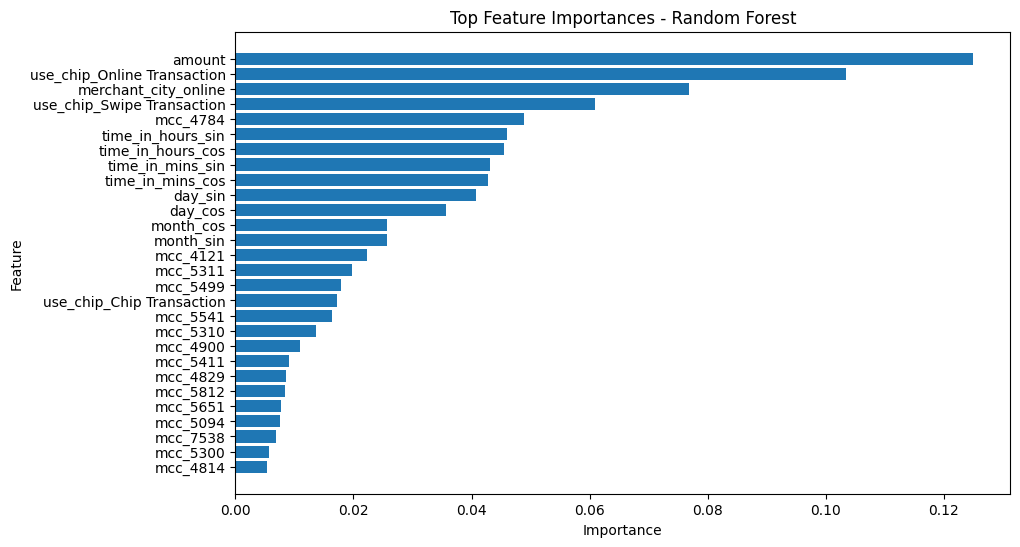

In [ ]:
feature_importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X_train_undersampled_partial.columns,  # Feature names
    'importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

feature_importance_df['cumulative_importance'] = feature_importance_df['importance'].cumsum()
significant_features = feature_importance_df[feature_importance_df['cumulative_importance'] <= 0.9]

plt.figure(figsize=(10, 6))
plt.barh(significant_features['feature'], significant_features['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.show()

**Analysis**

The transaction amount and method (online and swipe transaction) are the most significant predictors of fraud, highlighting the critical role these factors play in distinguishing fraudulent activities.

Temporal aspects and merchant category codes are also key features, emphasizing the importance of when and where transactions occur in fraud detection efforts.

After analyzing the plot, we decided to drop error columns, as it did not play much role in predictions.

In [ ]:
##can drop error cols
cols_to_drop = ['insufficient_balance','bad_pin', 'technical_glitch', 'bad_cvv','bad_card_number','bad_expiration','bad_zipcode']

In [ ]:
X_train_partial.drop(columns= cols_to_drop, axis=1, inplace=True)
X_test_partial.drop(columns= cols_to_drop, axis=1, inplace=True)

##5.3 Running the Base Model - Logistic Regression - with 3 Variants using 10% data

Since the problem intuitively corresponds to a binary classification problem, we made use of Logistic Regression as a baseline model. Its simplicity, Interpretability, efficiency, baseline performance, and benchmarking ability make it well suited for this purpose.

In [ ]:
numerical_feat = ['amount']

In [ ]:
def std_feats(X_train, X_test, numerical_feat):
  scaler = StandardScaler()
  X_train_num_scaled = scaler.fit_transform(X_train[numerical_feat])
  X_test_num_scaled = scaler.transform(X_test[numerical_feat])

  X_train[numerical_feat] = X_train_num_scaled
  X_test[numerical_feat] = X_test_num_scaled

  return X_train, X_test


In [ ]:
def fit_and_predict_base_model(X_train, X_test, y_train, y_test,std_feat='No'):

  if std_feat == 'Yes':
    numerical_feat = ['amount']
    X_train, X_test = std_feats(X_train, X_test, numerical_feat)
    print('Standardization complete.')

  lrg = LogisticRegression()

  lrg.fit(X_train, y_train)
  y_pred_train_lrg = lrg.predict(X_train)
  y_pred_test_lrg = lrg.predict(X_test)
  y_prob_train_lrg = lrg.predict_proba(X_train)[:, 1]
  y_prob_test_lrg = lrg.predict_proba(X_test)[:, 1]

  lrg_train_acc = accuracy_score(y_train, y_pred_train_lrg)
  lrg_test_acc = accuracy_score(y_test, y_pred_test_lrg)
  lrg_train_rec = recall_score(y_train, y_pred_train_lrg)
  lrg_test_rec = recall_score(y_test, y_pred_test_lrg)
  lrg_train_pre = precision_score(y_train, y_pred_train_lrg)
  lrg_test_pre = precision_score(y_test, y_pred_test_lrg)
  lrg_train_roc = roc_auc_score(y_train, y_prob_train_lrg)
  lrg_test_roc = roc_auc_score(y_test, y_prob_test_lrg)

  print('Regular Logistic Regression Performance')
  print('---------------------------------------')
  print(f'Training Accuracy: {lrg_train_acc*100:.2f}%')
  print(f'Testing Accuracy: {lrg_test_acc*100:.2f}%')
  print(f'Training Recall: {lrg_train_rec:.2f}')
  print(f'Testing Recall: {lrg_test_rec:.2f}')
  print(f'Training Precision: {lrg_train_pre:.2f}')
  print(f'Testing Precision: {lrg_test_pre:.2f}')
  print(f'Training ROC AUC Score: {lrg_train_roc:.2f}')
  print(f'Testing ROC AUC Score: {lrg_test_roc:.2f}')

  cm = pd.crosstab(y_test, y_pred_test_lrg, rownames=['Actual'], colnames=['Predicted'])
  plt.figure(figsize = (8,6))
  sns.heatmap(cm,
              xticklabels=['Legitimate', 'Fraud'],
              yticklabels=['Legitimate', 'Fraud'],
              annot = True,
              fmt='d',
              linewidths=0.2,
              linecolor='Darkblue',
              cmap = 'Blues')
  plt.title('Confusion Matrix', fontsize = 14)
  plt.show()



In [ ]:
X_train_undersampled_partial.drop(columns= cols_to_drop, axis=1, inplace=True)

**# Variant 1 - Under-sampling**

Standardization complete.
Regular Logistic Regression Performance
---------------------------------------
Training Accuracy: 85.72%
Testing Accuracy: 88.46%
Training Recall: 0.83
Testing Recall: 0.83
Training Precision: 0.88
Testing Precision: 0.08
Training ROC AUC Score: 0.93
Testing ROC AUC Score: 0.93


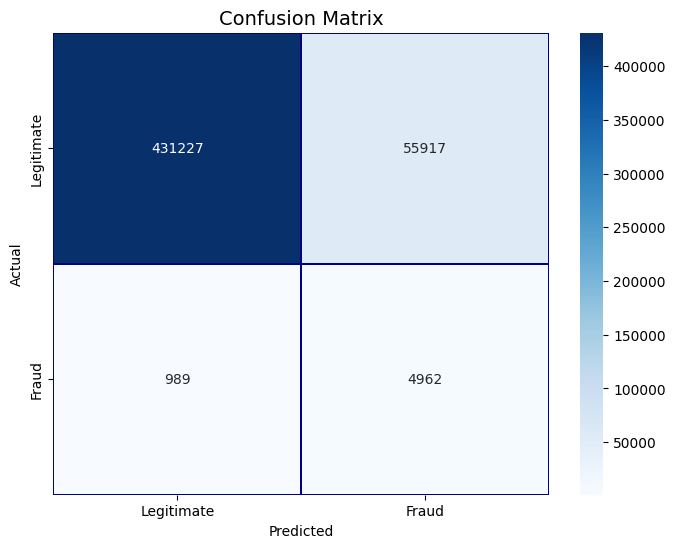

In [ ]:
# Variant 1 - Under-sampling
fit_and_predict_base_model(X_train_undersampled_partial, X_test_partial, y_train_undersampled_partial, y_test_partial,std_feat='Yes')

**# Variant 2 - Original Dataset**

Standardization complete.
Regular Logistic Regression Performance
---------------------------------------
Training Accuracy: 99.17%
Testing Accuracy: 99.17%
Training Recall: 0.36
Testing Recall: 0.35
Training Precision: 0.88
Testing Precision: 0.90
Training ROC AUC Score: 0.89
Testing ROC AUC Score: 0.89


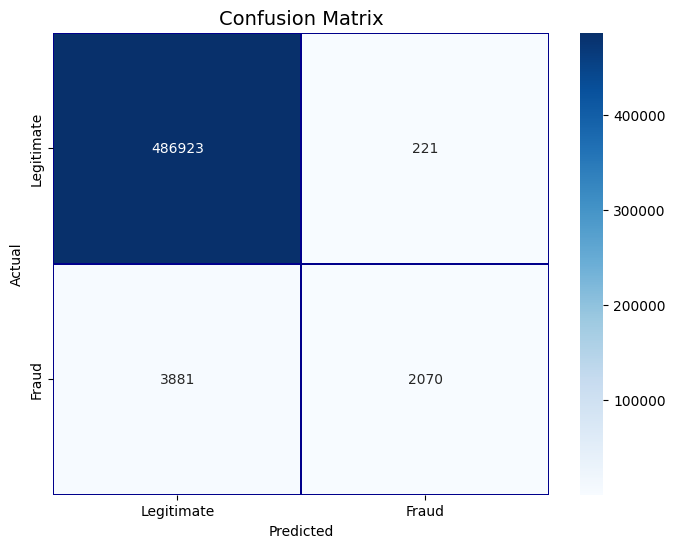

In [ ]:
# Variant 2 - Original Dataset
fit_and_predict_base_model(X_train_partial, X_test_partial, y_train_partial, y_test_partial, std_feat='Yes')

**# Variant 3 - SMOTE**

Standardization complete.


C:\Users\saaransh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Regular Logistic Regression Performance
---------------------------------------
Training Accuracy: 88.95%
Testing Accuracy: 92.52%
Training Recall: 0.86
Testing Recall: 0.75
Training Precision: 0.91
Testing Precision: 0.11
Training ROC AUC Score: 0.89
Testing ROC AUC Score: 0.84


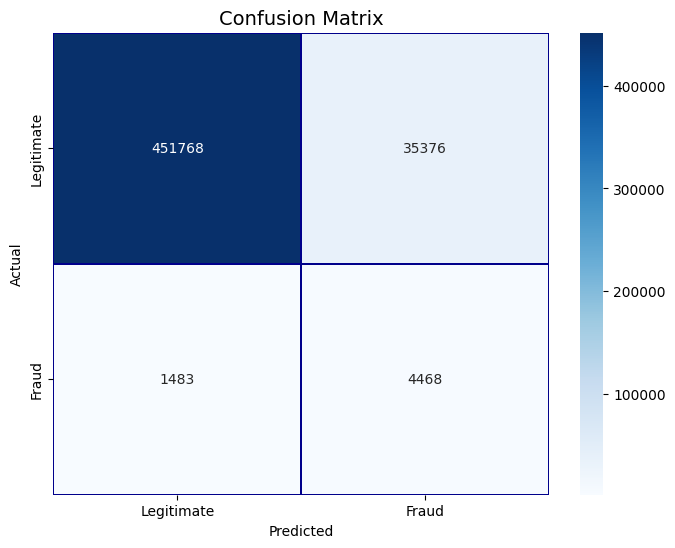

In [ ]:
##SMOTE using 10% of original-dataset

smote_partial = SMOTE(random_state=42)
X_train_oversampled_partial, y_train_oversampled_partial = smote_partial.fit_resample(X_train_partial, y_train_partial)

fit_and_predict_base_model(X_train_oversampled_partial, X_test_partial, y_train_oversampled_partial, y_test_partial,std_feat='Yes')

**Analysis**

Based on above analysis, we decided to move forward with undersampling of the data, as it gave the best test recall of **0.83** compared to original dataset (test recall of **0.35**) and SMOTE (test recall of **0.75**).



##5.4 Undersampling Entire Dataset

Since we decided to go forward with the "undersampling" technique to handle class imbalance, we create a final Undersampled Dataset, using the entire original dataset.

In [ ]:
X.drop(columns= cols_to_drop, axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

In [ ]:
##Under-sampling

rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

##5.5 Running the Models with UnderSampled Dataset

**Function to Predict the fraduent transactions using each Model**

In [ ]:
def fit_pred_model(clf_name, clf, X_train, X_test, y_train, y_test, std_feat, info_arr):
  if std_feat == 'Yes':
    numerical_feat = ['amount']
    X_train, X_test = std_feats(X_train, X_test, numerical_feat)
    print('Standardization complete.')

  clf.fit(X_train, y_train)

  y_pred_train = clf.predict(X_train)
  y_pred_test = clf.predict(X_test)

  clf_train_acc = accuracy_score(y_train, y_pred_train)
  clf_test_acc = accuracy_score(y_test, y_pred_test)
  clf_train_rec = recall_score(y_train, y_pred_train)
  clf_test_rec = recall_score(y_test, y_pred_test)
  clf_train_pre = precision_score(y_train, y_pred_train)
  clf_test_pre = precision_score(y_test, y_pred_test)
  clf_train_roc = roc_auc_score(y_train, y_pred_train)
  clf_test_roc = roc_auc_score(y_test, y_pred_test)

  info_dict = {}
  info_dict['Model'] = clf_name
  info_dict['Training Accuracy'] = clf_train_acc
  info_dict['Test Accuracy'] = clf_test_acc
  info_dict['Training Recall'] = clf_train_rec
  info_dict['Test Recall'] = clf_test_rec
  info_dict['Training Precision'] = clf_train_pre
  info_dict['Test Precision'] = clf_test_pre
  info_dict['Training ROC AUC Score'] = clf_train_roc
  info_dict['Test ROC AUC Score'] = clf_test_roc

  info_arr.append(info_dict)


  print(f'{clf_name} Performance')
  print('---------------------------------------')
  print(f'Training Accuracy: {clf_train_acc*100:.2f}%')
  print(f'Testing Accuracy: {clf_test_acc*100:.2f}%')
  print(f'Training Recall: {clf_train_rec:.2f}')
  print(f'Testing Recall: {clf_test_rec:.2f}')
  print(f'Training Precision: {clf_train_pre:.2f}')
  print(f'Testing Precision: {clf_test_pre:.2f}')
  print(f'Training ROC AUC Score: {clf_train_roc:.2f}')
  print(f'Testing ROC AUC Score: {clf_test_roc:.2f}')

  cm = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'])
  plt.figure(figsize = (8,6))
  sns.heatmap(cm,
              xticklabels=['Legitimate', 'Fraud'],
              yticklabels=['Legitimate', 'Fraud'],
              annot = True,
              fmt='d',
              linewidths=0.2,
              linecolor='Darkblue',
              cmap = 'Blues')
  plt.title('Confusion Matrix', fontsize = 14)
  plt.show()


  print(f'{clf_name} executed successfully.')
  print('---------------------------------------')

In [ ]:
info_arr = []
models = ['Logistic Regression (regular)', 'Random Forest', 'XGBoost']
models_clf = [LogisticRegression(random_state=42), RandomForestClassifier(random_state=42), XGBClassifier(random_state=42) ]

###5.5.1 Logistic Regression

Standardization complete.
Logistic Regression (regular) Performance
---------------------------------------
Training Accuracy: 85.60%
Testing Accuracy: 88.65%
Training Recall: 0.83
Testing Recall: 0.83
Training Precision: 0.88
Testing Precision: 0.01
Training ROC AUC Score: 0.86
Testing ROC AUC Score: 0.86


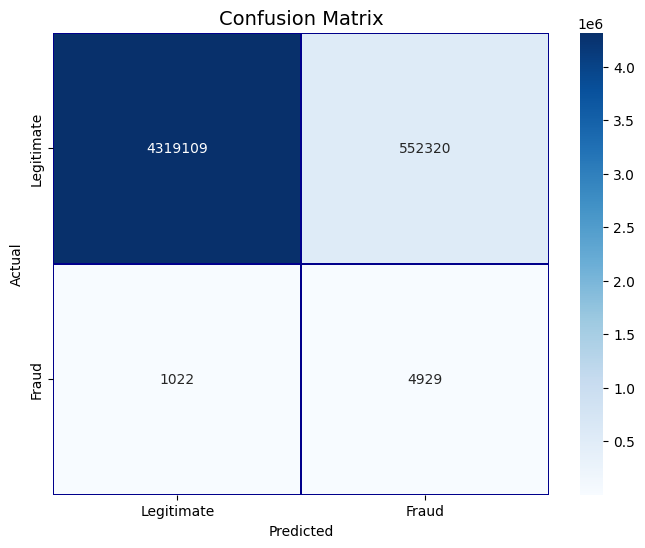

Logistic Regression (regular) executed successfully.
---------------------------------------


In [ ]:
fit_pred_model(models[0], models_clf[0], X_train_undersampled, X_test, y_train_undersampled, y_test, 'Yes', info_arr)

**Analysis**

The Logistic Regression model gave us a baseline performance of **0.83** recall value. This indicated to us that it is well suited for the dataset at hand, with sufficient room for improvement. Further, AUC-ROC metric (particularly well suited to ignoring class distribution) also gave us a score of **0.86**, indicating good starting trade-off between True Positive and False Positive Rates.

###5.5.2 RandomForest Classifier

In Logistic Regression, we wanted to implement a Random Forest Classifier. Random Forest, an ensemble of decision trees, is inherently suited to model non-linear interactions between features without requiring any transformation of variables. Hence, we decided to use this model next to see if it improved performance.

Random Forest Performance
---------------------------------------
Training Accuracy: 100.00%
Testing Accuracy: 90.96%
Training Recall: 1.00
Testing Recall: 0.86
Training Precision: 1.00
Testing Precision: 0.01
Training ROC AUC Score: 1.00
Testing ROC AUC Score: 0.88


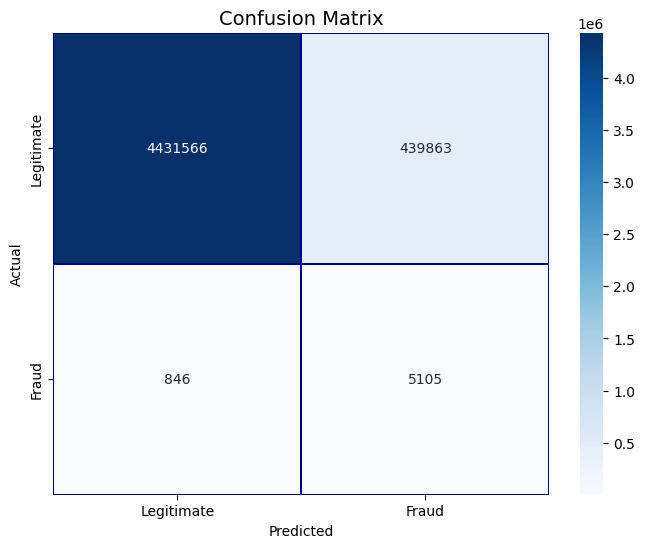

Random Forest executed successfully.
---------------------------------------


In [ ]:
fit_pred_model(models[1], models_clf[1], X_train_undersampled, X_test, y_train_undersampled, y_test, 'No', info_arr)

**Analysis**

The Random Forest model gave us test recall of **0.86** value. This indicated a considerable improvement over the baseline model, with further room for improvement. AUC-ROC metric gave us a score of **0.96**, indicating a very good performance in identifying True Positives and False Positives.

At the same time, we also observed training recall value is close to 1 and much higher than test recall value, suggesting the model might be overfitting.


###5.5.3 XGBoost

Integrating XGBoost after using simpler models like Logistic Regression and more complex ensemble methods like Random Forest will be an advancement in model development, particularly because we are dealing with high-dimensional, complex dataset. XGBoost is renowned for its performance and speed in classification problems, including its numerous features that make it particularly suited for challenging datasets.

XGBoost Performance
---------------------------------------
Training Accuracy: 90.38%
Testing Accuracy: 91.66%
Training Recall: 0.88
Testing Recall: 0.86
Training Precision: 0.93
Testing Precision: 0.01
Training ROC AUC Score: 0.90
Testing ROC AUC Score: 0.89


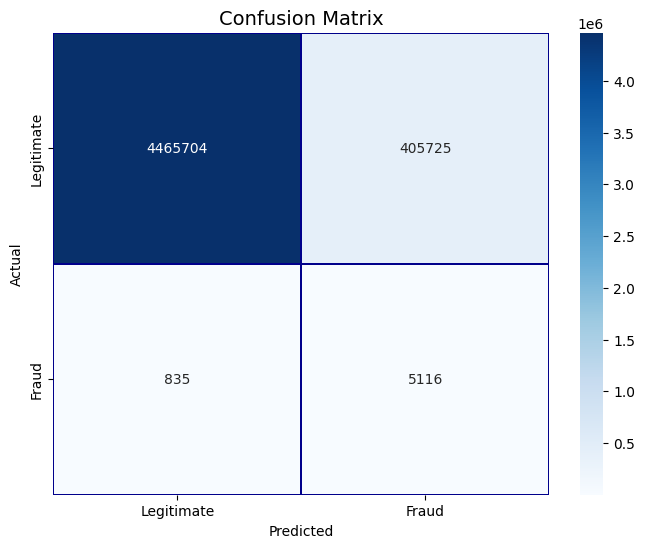

XGBoost executed successfully.
---------------------------------------


In [ ]:
fit_pred_model(models[2], models_clf[2], X_train_undersampled, X_test, y_train_undersampled, y_test, 'No', info_arr)

**Analysis**

The XGBoost model, demonstrated high reliability in fraud detection with training and test recall of **0.9** and **0.86**, respectively - effectively identifying a substantial proportion of fraudulent transactions. However, the model faced challenges with precision in the testing phase, where it scored notably low at 0.01, indicating a significant number of false positives.

Despite this, the model excelled in distinguishing between classes, as evidenced by high ROC AUC scores of 0.98 and 0.96 in training and testing, respectively, showcasing its strong discriminative power though with room for improvement in specificity.

## 5.6 Model Comparison

In [ ]:
df_models = pd.DataFrame(info_arr)
df_models

,Model,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision,Training ROC AUC Score,Test ROC AUC Score
0,Logistic Regression (regular),0.856045,0.886549,0.826052,0.828264,0.878765,0.008845,0.856045,0.857442
1,Random Forest,1.000000,0.909642,1.000000,0.857839,1.000000,0.011473,1.000000,0.883772
2,XGBoost,0.903827,0.916644,0.878056,0.859687,0.925772,0.012453,0.903827,0.888200


**Analysis**

The performance evaluation of our models revealed a consistent challenge with the Precision metric, as each model tended to generate a high number of false positives. This issue indicates that while the models are adept at identifying potential fraudulent transactions, they also mistakenly classify many legitimate transactions as fraudulent. Despite this, our primary metric of interest in this context is Recall, since our main objective is to accurately identify as many true fraudulent transactions as possible—even at the expense of incurring some false positives.

Given our emphasis on maximizing Recall, the decision was made to prioritize models based on their ability to capture the highest number of true positives (actual fraud cases). After thorough assessment, XGBoost emerged as the leading model in terms of Recall performance. This model demonstrated the highest capability in correctly identifying fraudulent transactions, which is critical for effective fraud detection systems.

Following closely, Random Forest was selected as the second-best model based on its similarly strong Recall performance. While Random Forest and XGBoost shared comparable levels of effectiveness in identifying fraudulent activities, XGBoost slightly outperformed due to its more refined handling of class imbalance and its robustness against overfitting through both its boosting strategy and built-in regularization.

##5.7 Hyper-parameter tuning

Recognizing the opportunity to enhance model performance through optimal tuning of hyperparameters, we implemented RandomizedSearchCV from Scikit-learn as a strategic method to conduct hyperparameter optimization. This technique involves using cross-validation to ensure that the tuning process is robust and generalizes well across different subsets of the dataset.

**Function to finetune the models**

In [ ]:
def finetune_model(X_train, X_test, y_train, y_test, clf, clf_name, param_dist, cv=5, n_iter=30):

    random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter, scoring='recall', verbose=1,
                                   random_state=42, cv=cv)

    random_search.fit(X_train_undersampled, y_train_undersampled)

    print("Best Hyperparameters:", random_search.best_params_)
    print("Best Score:", random_search.best_score_)

    print('---------------------------------------')
    print('---------------------------------------')
    y_pred_train = random_search.best_estimator_.predict(X_train)
    y_pred_train_proba = random_search.best_estimator_.predict_proba(X_train)[:, 1]
    y_pred_test = random_search.best_estimator_.predict(X_test)
    y_pred_test_proba = random_search.best_estimator_.predict_proba(X_test)[:, 1]

    clf_train_acc = accuracy_score(y_train, y_pred_train)
    clf_test_acc = accuracy_score(y_test, y_pred_test)
    clf_train_rec = recall_score(y_train, y_pred_train)
    clf_test_rec = recall_score(y_test, y_pred_test)
    clf_train_pre = precision_score(y_train, y_pred_train)
    clf_test_pre = precision_score(y_test, y_pred_test)
    clf_train_roc = roc_auc_score(y_train, y_pred_train_proba)
    clf_test_roc = roc_auc_score(y_test, y_pred_test_proba)

    print(f'{clf_name} Fine-Tuning Performance')
    print('---------------------------------------')
    print(f'Training Accuracy: {clf_train_acc*100:.2f}%')
    print(f'Testing Accuracy: {clf_test_acc*100:.2f}%')
    print(f'Training Recall: {clf_train_rec:.2f}')
    print(f'Testing Recall: {clf_test_rec:.2f}')
    print(f'Training Precision: {clf_train_pre:.2f}')
    print(f'Testing Precision: {clf_test_pre:.2f}')
    print(f'Training ROC AUC Score: {clf_train_roc:.2f}')
    print(f'Testing ROC AUC Score: {clf_test_roc:.2f}')

    cm = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'])
    plt.figure(figsize = (8,6))
    sns.heatmap(cm,
                xticklabels=['Legitimate', 'Fraud'],
                yticklabels=['Legitimate', 'Fraud'],
                annot = True,
                fmt='d',
                linewidths=0.2,
                linecolor='Darkblue',
                cmap = 'Blues')
    plt.title('Confusion Matrix', fontsize = 14)
    plt.show()


    print(f'{clf_name} executed successfully.')
    print('---------------------------------------')


###5.7.1 Random Forest

We addressed the Random Forest model, recognizing its potential due to its similarity in performance to XGBoost. Here, the objective was again to enhance the model's recall. The tuning involved a randomized search across a defined range of hyperparameters, with particular attention to those affecting model depth and complexity to avoid overfitting which was observed in the base model.

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best Score: 0.8625136281143313
---------------------------------------
---------------------------------------
Random Forest Fine-Tuning Performance
---------------------------------------
Training Accuracy: 97.96%
Testing Accuracy: 91.02%
Training Recall: 0.98
Testing Recall: 0.86
Training Precision: 0.98
Testing Precision: 0.01
Training ROC AUC Score: 1.00
Testing ROC AUC Score: 0.96


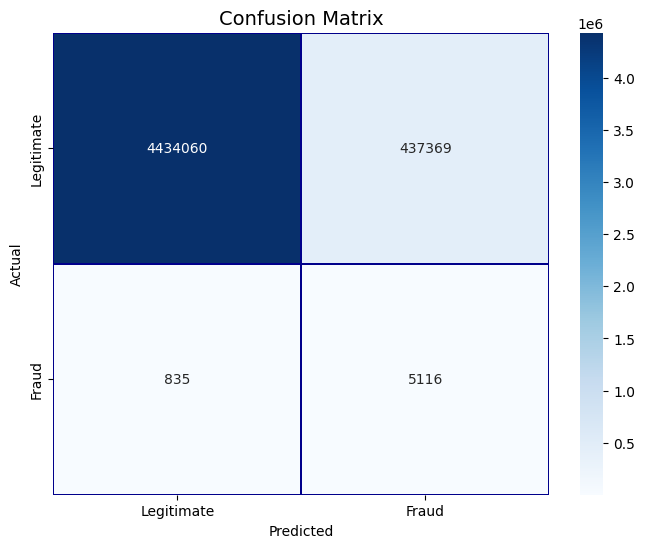

Random Forest executed successfully.
---------------------------------------


In [ ]:
rf = RandomForestClassifier(random_state=42)

param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3]
}

finetune_model(X_train_undersampled, X_test, y_train_undersampled, y_test, rf, 'Random Forest', param_dist_rf)

**Analysis**

Upon implementing hyperparameter tuning through RandomizedSearchCV on our Random Forest model, we observed a nuanced improvement in performance metrics compared to the baseline configuration of the model. Specifically, there was a noticeable reduction in the number of false negatives and an enhancement in the ROC-AUC score. These improvements suggest that the model has become more adept at correctly identifying fraudulent transactions and distinguishing between the classes with greater accuracy.

Despite these positive developments, the recall score remained stable at 0.86, mirroring the performance of the base model. This consistency in recall indicates that while the adjustments to the hyperparameters have enhanced certain aspects of the model's predictive capabilities, they did not significantly impact its ability to capture the majority of true positive cases (i.e., actual fraud instances).

###5.7.2 XGBoost

With the XGBoost model, we aimed to optimize its recall due to its critical role in accurately identifying true positives, especially given our focus on minimizing false negatives in fraud detection

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.05}
Best Score: 0.868142459457049
---------------------------------------
---------------------------------------
XGBoost Fine-Tuning Performance
---------------------------------------
Training Accuracy: 91.85%
Testing Accuracy: 91.56%
Training Recall: 0.90
Testing Recall: 0.86
Training Precision: 0.94
Testing Precision: 0.01
Training ROC AUC Score: 0.98
Testing ROC AUC Score: 0.96


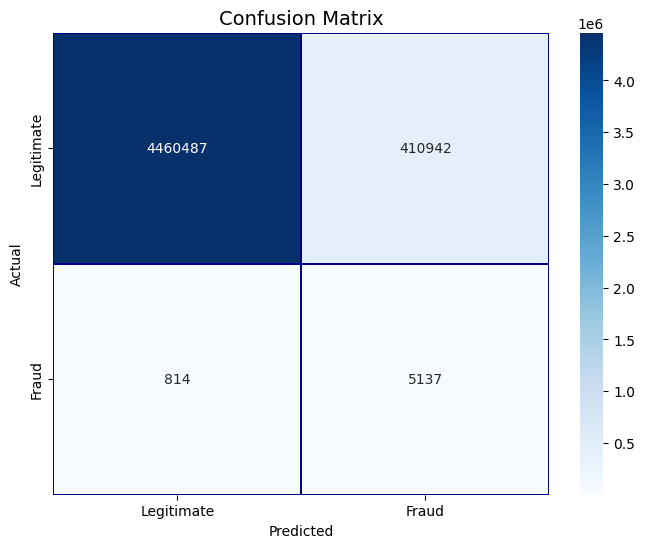

XGBoost executed successfully.
---------------------------------------


In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 10],
    'learning_rate': [0.01, 0.05, 0.01],
    'subsample': [0.6, 0.8]
}

finetune_model(X_train_undersampled, X_test, y_train_undersampled, y_test, xgb, 'XGBoost', param_dist_xgb
               )


**Analysis**

Even in this case, we observed a slight improvement in reduction in the number of false negatives and an enhancement in the ROC-AUC score. These improvements suggest that the model has become more adept at correctly identifying fraudulent transactions and distinguishing between the classes with greater accuracy.

Despite these positive developments, the recall score remained stable at 0.86, mirroring the performance of the base model. This consistency in recall indicates that while the adjustments to the hyperparameters have enhanced certain aspects of the model's predictive capabilities, they did not significantly impact its ability to capture the majority of true positive cases (i.e., actual fraud instances).

 **To Conclude: XGBoost outperformed all the other models, keeping Recall score as the metric.**


##5.8 Neural Networks

We decided to create a neural network in order to capture greater complexity within the data. Because neural networks can have many hidden layers, we can substantially increase the model complexity in comparison to the previous ensemble methods that we utilized.

We developed a binary classification neural network with two main hidden layers. The network begins with an input layer of 122 units, followed by a first hidden layer of 64 units with batch normalization and a dropout rate of 0.5. The second hidden layer consists of 32 units, also followed by batch normalization and a dropout rate of 0.3. The output is generated through a sigmoid activation function in the final layer to produce probabilities, for detecting fraudulent transactions.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import WeightedRandomSampler

In [ ]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.layer1 = nn.Linear(122, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout1 = nn.Dropout(0.5)
        self.layer2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.dropout2 = nn.Dropout(0.3)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)
        x = torch.sigmoid(self.output(x))
        return x

In [ ]:
X_train_tensor = torch.tensor(X_train_undersampled.values.astype(np.float32))
y_train_tensor = torch.tensor(y_train_undersampled.values.astype(np.float32)).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values.astype(np.float32))
y_test_tensor = torch.tensor(y_test.values.astype(np.float32)).view(-1, 1)


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


In [ ]:
class_counts = torch.tensor([(y_train_undersampled == 0).sum(), (y_train_undersampled == 1).sum()])
total_count = class_counts.sum()
class_weights = total_count / class_counts
sample_weights = class_weights[np.array(y_train_undersampled.astype(int))]
sample_weights = torch.tensor(sample_weights, dtype=torch.float32)



sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights))
# sampler = WeightedRandomSampler(weights, len(weights))
train_loader = DataLoader(dataset=train_dataset, batch_size=64, sampler=sampler)


C:\Users\AAKASH AGARWAL\AppData\Local\Temp\ipykernel_35304\2556110782.py:5: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



To tackle the class imbalance, we used WeightedRandomSampler.

In [ ]:
class_counts = {}
for _, targets in train_loader:

    for target in targets:

        label = int(target.item())
        if label in class_counts:
            class_counts[label] += 1
        else:
            class_counts[label] = 1

print("Class distribution:", class_counts)

Class distribution: {0: 23780, 1: 23832}


In [ ]:
model = BinaryClassifier()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.BCELoss()
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

In [ ]:
def train_model(num_epochs):
    model.train()
    for epoch in range(num_epochs):
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = loss_function(output, target)
            # weights = class_weights[target.long().squeeze()]
            # weighted_losses = loss * weights
            # final_loss = weighted_losses.mean()
            # final_loss.backward()
            loss.backward()
            optimizer.step()
        scheduler.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

train_model(30)

Epoch 1, Loss: 0.5748493671417236
Epoch 2, Loss: 0.26769131422042847
Epoch 3, Loss: 0.39049437642097473
Epoch 4, Loss: 0.249715194106102
Epoch 5, Loss: 0.3672252595424652
Epoch 6, Loss: 0.31603744626045227
Epoch 7, Loss: 0.22713260352611542
Epoch 8, Loss: 0.33150479197502136
Epoch 9, Loss: 0.3524766266345978
Epoch 10, Loss: 0.28642886877059937
Epoch 11, Loss: 0.33189234137535095
Epoch 12, Loss: 0.5243692398071289
Epoch 13, Loss: 0.21674366295337677
Epoch 14, Loss: 0.2271520048379898
Epoch 15, Loss: 0.32841670513153076
Epoch 16, Loss: 0.31764233112335205
Epoch 17, Loss: 0.28136417269706726
Epoch 18, Loss: 0.39191851019859314
Epoch 19, Loss: 0.19130899012088776
Epoch 20, Loss: 0.46714574098587036
Epoch 21, Loss: 0.22496891021728516
Epoch 22, Loss: 0.4147014021873474
Epoch 23, Loss: 0.32688039541244507
Epoch 24, Loss: 0.26486000418663025
Epoch 25, Loss: 0.27136677503585815
Epoch 26, Loss: 0.4029137194156647
Epoch 27, Loss: 0.273205429315567
Epoch 28, Loss: 0.22583745419979095
Epoch 29, Lo

NN Performance
---------------------------------------
Testing Accuracy: 89.74%
Testing Recall: 0.84
Testing Precision: 0.01
Testing ROC AUC Score: 0.95


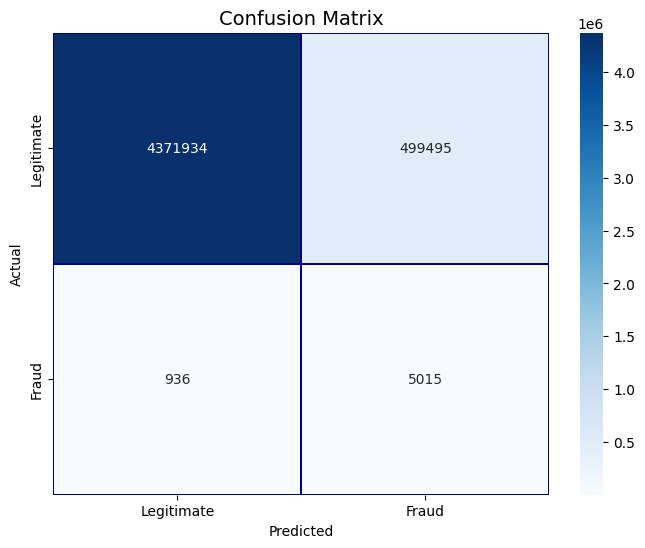

In [ ]:
def evaluate_model():
    model.eval()
    predictions, actuals, probabilities = [], [], []
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            predicted = (output > 0.5).float()
            predictions.extend(predicted.view(-1).tolist())
            actuals.extend(target.view(-1).tolist())
            probabilities.extend(output.view(-1).tolist())

    predictions = np.array(predictions)
    actuals = np.array(actuals)
    probabilities = np.array(probabilities)

    clf_test_acc = accuracy_score(actuals, predictions)
    clf_test_rec = recall_score(actuals, predictions)
    clf_test_pre = precision_score(actuals, predictions)
    clf_test_roc = roc_auc_score(actuals, probabilities)

    print(f'NN Performance')
    print('---------------------------------------')
    print(f'Testing Accuracy: {clf_test_acc*100:.2f}%')
    print(f'Testing Recall: {clf_test_rec:.2f}')
    print(f'Testing Precision: {clf_test_pre:.2f}')
    print(f'Testing ROC AUC Score: {clf_test_roc:.2f}')

    cm = pd.crosstab(actuals, predictions, rownames=['Actual'], colnames=['Predicted'])
    plt.figure(figsize = (8,6))
    sns.heatmap(cm,
                xticklabels=['Legitimate', 'Fraud'],
                yticklabels=['Legitimate', 'Fraud'],
                annot = True,
                fmt='d',
                linewidths=0.2,
                linecolor='Darkblue',
                cmap = 'Blues')
    plt.title('Confusion Matrix', fontsize = 14)
    plt.show()


evaluate_model()

**Analysis**

The confusion matrix and performance metrics reveal significant aspects of our model's ability to detect fraud. The model demonstrated a strong ability to identify true positives, as evidenced by a recall score of 0.84, indicating that it successfully identified 84% of all fraudulent transactions. However, the precision was notably low at 0.01, highlighting a challenge in distinguishing between legitimate and fraudulent transactions without generating a high number of false positives. The ROC AUC score was robust at 0.95, demonstrating the model's effectiveness in discriminating between the classes across various threshold settings.

#Part 6: Conclusion

In conclusion, our XGBoost model demonstrated exceptional capability, achieving the highest recall score among the models tested. The model recorded a testing recall of **0.86**, indicating strong capability to correctly identify fraud. The precision in testing was low at 0.01, suggesting a high number of false positives; however, the high recall is critical in this context where capturing potential fraud is prioritized.

This success underscores the potential of XGBoost to serve as a robust tool for credit card fraud detection, suggesting that further testing on the full dataset could yield even more promising results in enhancing our fraud detection capabilities.

##6.1 Interpretability VS Performance

The balance between interpretability & performance is crucial; however, performance typically takes precedence in our use case to ensure high accuracy and recall in identifying fraudulent transactions, especially in operational settings where preventing fraud is critical. In credit card fraud detection, performance, specifically accuracy and recall, is paramount. High recall ensures that the majority of fraudulent transactions are detected, minimizing financial loss, while high accuracy reduces false positives, maintaining customer satisfaction and operational efficiency. The ability to quickly identify and respond to fraudulent transactions is also critical. Models with superior performance can process transactions in real time and can scale well to handle large volumes of data, providing immediate alerts and actions to prevent fraud before significant damage occurs.

## 6.2 Limitations & Future Scope


* Model Generalization and Data Diversity - The robustness of fraud detection models can be improved with more diverse datasets, encompassing a broader range of transaction types and fraud scenarios. This would help in enhancing the model’s generalization capabilities across different environments and conditions.

* Mitigating Model Bias - It’s crucial to address and reduce biases that may occur due to overrepresentation or underrepresentation of certain types of transactions. Ensuring that the model performs well across all transaction segments is essential for fair and accurate fraud detection.

* Real-Time Detection Capabilities - Developing capabilities for real-time fraud detection can significantly enhance the effectiveness of preventive measures. This involves not only the speed of detection but also the accuracy with which models can operate in a live environment.

* Adaptive Fraud Detection Techniques - As fraud tactics evolve, so should our detection strategies. Future work could focus on adaptive algorithms that continuously learn and adjust to new fraudulent behaviors, potentially through the application of machine learning techniques that can evolve with changing patterns without requiring constant human supervision.